## 1. Almost Valid Palindrome

### Step-by-Step Approach for Valid Palindrome with At Most One Deletion

#### 1. Clarify the Problem
- The goal is to determine whether a given string `s` can be a palindrome by removing at most one character.
- A **palindrome** reads the same forwards and backwards.
- Ask clarifying questions:
  - What is the expected return type? (Boolean: True or False)
  - Is the input string guaranteed to contain only lowercase letters?
  - What should we return for an empty string or a single-character string?

---

#### 2. Plan the Approach
We use a two-pointer technique to check for palindrome validity with at most one deletion:

1. **Initial Check**:
   - If the length of `s` is less than or equal to 2, the result is always `True` because such strings can be palindromes with no or one deletion.

2. **Two-Pointer Approach**:
   - Use two pointers, `left` and `right`, starting at the beginning and end of the string, respectively.
   - While `left` is less than `right`:
     - If `s[left]` equals `s[right]`, move the pointers inward.
     - If `s[left]` does not equal `s[right]`, check if removing either `s[left]` or `s[right]` results in a valid palindrome.

3. **Helper Function**:
   - Implement a `checkPalindrome` helper function that verifies if a substring is a palindrome, using a similar two-pointer approach.

4. **Return Result**:
   - If all checks pass, return `True`. Otherwise, return `False`.

---

#### 3. Complexity Analysis
- **Time Complexity**:
  - The main loop runs at most O(n), where `n` is the length of the string.
  - The `checkPalindrome` helper function also runs at most O(n) in the worst case.
  - Total time complexity: O(n).
- **Space Complexity**:
  - No additional data structures are used, so the space complexity is O(1).

---

#### 4. Example Walkthrough
**Example 1**:
- Input: `s = "abca"`
- Steps:
  1. Initial pointers: `left = 0`, `right = 3`.
     - `s[left] = 'a'` matches `s[right] = 'a'`.
     - Move pointers inward: `left = 1`, `right = 2`.
  2. `s[left] = 'b'` does not match `s[right] = 'c'`.
     - Check removing one character:
       - Check substring `"bca"` by removing `s[right]` (`checkPalindrome(s, left + 1, right)`). Result: `False`.
       - Check substring `"abc"` by removing `s[left]` (`checkPalindrome(s, left, right - 1)`). Result: `True`.
  3. Return `True`.

**Output**: `True`

---

**Example 2**:
- Input: `s = "racecar"`
- Steps:
  1. Initial pointers: `left = 0`, `right = 6`.
     - All characters match as the pointers move inward.
  2. The string is already a palindrome.

**Output**: `True`

---

#### 5. Edge Cases
1. **Empty String**:
   - Input: `s = ""`
   - Output: `True` (An empty string is trivially a palindrome).
2. **Single Character**:
   - Input: `s = "a"`
   - Output: `True` (Single-character strings are always palindromes).
3. **Two Characters**:
   - Input: `s = "ab"`
   - Output: `True` (By removing one character, it becomes a palindrome).

---

#### 6. Wrap-Up
- Restate the approach:
  - Use a two-pointer technique to verify palindrome validity, with the option to skip one character when encountering a mismatch.
- Complexity Recap:
  - Time complexity is O(n), and space complexity is O(1).
- Ask for feedback or edge cases:
  - "Does this solution handle the requirements? Are there additional scenarios you'd like me to test?"


In [1]:
def almostValid(s):
    if len(s) <= 2:
        return True
    
    def checkPalindrome(s, left, right):
        while left < right:
            if s[left] != s[right]:
                return False
            left += 1
            right -= 1
        return True
    
    left = 0
    right = len(s) - 1
    
    while left < right:
        if s[left] != s[right]:
            return checkPalindrome(s, left + 1, right) or checkPalindrome(s, left, right - 1)
        left += 1
        right -= 1
    return True

In [2]:
almostValid("abac")

True

## 2. Kth Largest Element

In [3]:
def findKthLargestQuickSort(nums, k):
    quickSort(nums, 0, len(nums) - 1)
    return nums[-k]

def quickSort(nums, left, right):
    if left < right:
        partitionIndex = partition(nums, left, right)
        quickSort(nums, left, partitionIndex - 1)
        quickSort(nums, partitionIndex + 1, right)
        
def partition(nums, left, right):
    partitionIndex = left
    pivotElement = nums[right]
    
    for j in range(left, right):
        if nums[j] <= pivotElement:
            nums[j], nums[partitionIndex] = nums[partitionIndex], nums[j]
            partitionIndex += 1
    nums[right], nums[partitionIndex] = nums[partitionIndex], nums[right]
    return partitionIndex

In [4]:
findKthLargestQuickSort([5,6,1,4,8,3],2)

6

### Step-by-Step Approach for Finding the K-th Largest Element Using QuickSelect

#### 1. Clarify the Problem
- The goal is to find the K-th largest element in an unsorted array.
- Ask clarifying questions:
  - Does the input contain only integers?
  - How should we handle duplicate values?
  - Should the function return the K-th largest element or its index?

---

#### 2. Plan the Approach
We will use the **QuickSelect** algorithm, which is a variation of the QuickSort algorithm, to solve this problem efficiently. 

1. **Key Idea**:
   - QuickSelect works by partitioning the array around a pivot element and then determining whether the desired index lies in the left or right partition.
   - This avoids fully sorting the array, making the algorithm faster for this specific task.

2. **Steps**:
   - **Convert K to a Zero-Based Index**:
     - The K-th largest element corresponds to the `(len(nums) - k)`-th smallest element in zero-based indexing.
   - **QuickSelect**:
     - Use a recursive function to partition the array.
     - If the pivot’s position matches the target index, return the pivot.
     - Otherwise, recurse into the left or right partition depending on the target index.
   - **Partition Function**:
     - Rearrange the elements such that all elements smaller than the pivot are on the left and larger ones are on the right.
     - Return the pivot's final position.

3. **Complexity**:
   - **Time Complexity**:
     - Best/Average Case: O(n), because each partition reduces the problem size by approximately half.
     - Worst Case: O(n^2), when the array is already sorted or all elements are equal.
   - **Space Complexity**:
     - O(1), as QuickSelect operates in-place.

---


In [5]:
# T --> O(n), worst case O(n^2) in case of [8, 6, 5, 4, 3, 1]
# S --> O(1), because of quickselect

def findKthLargestQuickSelect(nums, k):
    indexToFind = len(nums) - k
    return quickSelect(nums, 0, len(nums) - 1, indexToFind)

def quickSelect(nums, left, right, indexToFind):
    if left == right:
        return nums[left]
    
    if left < right:
        partitionIndex = partition(nums, left, right)
        if partitionIndex == indexToFind:
            return nums[partitionIndex]
        elif partitionIndex < indexToFind:
            return quickSelect(nums, partitionIndex + 1, right, indexToFind)
        else:
            return quickSelect(nums, left, partitionIndex - 1, indexToFind)

def partition(nums, left, right):
    partitionIndex = left
    pivotElement = nums[right]
    
    for j in range(left, right):
        if nums[j] <= pivotElement:
            nums[j], nums[partitionIndex] = nums[partitionIndex], nums[j]
            partitionIndex += 1
    nums[right], nums[partitionIndex] = nums[partitionIndex], nums[right]
    return partitionIndex

In [6]:
findKthLargestQuickSelect([5,6,1,4,8,3],3)

5

**First Round**

[5, 6, 1, 4, 8, 3]

[1, 6, 5, 4, 8, 3]

[1, 3, 5, 4, 8, 6]

indexToFind = 3, partitionIndex = 1, left = 0, right = 5

**Second Round**
indexToFind = 3, partitionIndex = 2, left = 2, right = 5

[1, 3, 5, 4, 8, 6]

[1, 3, 5, 4, 6, 8]

indexToFind = 3, partitionIndex = 4

**Third Round**

indexToFind = 3, partitionIndex = 3, left = 2, right = 3

[1, 3, 5, 4, 6, 8]


[1, 3, 4, 5, 6, 8]

## 3. Valid Word Abbreviation

### Step-by-Step Approach for Valid Word Abbreviation

#### 1. Clarify the Problem
- The goal is to determine whether a given word matches its abbreviation.
- Rules for valid abbreviations:
  - Numbers in the abbreviation indicate how many characters in the word are skipped.
  - Numbers must not have leading zeros.
  - Characters in the abbreviation must match the corresponding characters in the word.
- Ask clarifying questions:
  - What should we return for empty strings for either `word` or `abbr`? (Typically, an empty abbreviation is invalid unless the word is also empty.)
  - Are all inputs guaranteed to be lowercase and valid?

---

#### 2. Plan the Approach
We use two pointers to traverse the `word` and the `abbr` simultaneously:
1. **Handle Numbers in the Abbreviation**:
   - If the current character in `abbr` is a digit, calculate the number it represents (taking care to handle multiple digits).
   - Move the `word` pointer forward by the calculated number of characters.
   - Return `False` if the digit is `0` (invalid leading zero) or if the pointer goes out of bounds.

2. **Match Non-Digit Characters**:
   - If the current character in `abbr` is not a digit, ensure it matches the current character in `word`.
   - If it doesn't match, return `False`.

3. **End Check**:
   - At the end of both strings, the pointers must align perfectly; otherwise, return `False`.

---

#### 3. Complexity Analysis
- **Time Complexity**:
  - Each character in `word` and `abbr` is processed exactly once, resulting in \(O(n)\) time.
- **Space Complexity**:
  - No additional data structures are used, so the space complexity is \(O(1)\).

---

#### 4. Example Walkthrough

**Example 1**:
- Input: `word = "internationalization"`, `abbr = "i12iz4n"`
- Steps:
  1. `abbr_ptr = 0`, `word_ptr = 0`: `abbr[abbr_ptr] = 'i'` matches `word[word_ptr] = 'i'`. Move both pointers.
  2. `abbr_ptr = 1`: `abbr[abbr_ptr] = '1'` (start of number). Parse `12`.
     - Move `word_ptr` forward by `12`.
  3. `abbr_ptr = 3`, `word_ptr = 13`: `abbr[abbr_ptr] = 'i'` matches `word[word_ptr] = 'i'`. Move both pointers.
  4. `abbr_ptr = 4`: `abbr[abbr_ptr] = 'z'` matches `word[word_ptr] = 'z'`. Move both pointers.
  5. `abbr_ptr = 5`: Parse `4` and move `word_ptr` forward by `4`.
  6. `abbr_ptr = 7`, `word_ptr = 18`: `abbr[abbr_ptr] = 'n'` matches `word[word_ptr] = 'n'`.
  7. Both pointers reach the end. Return `True`.

**Output**: `True`

---

**Example 2**:
- Input: `word = "apple"`, `abbr = "a2e"`
- Steps:
  1. `abbr_ptr = 0`, `word_ptr = 0`: `abbr[abbr_ptr] = 'a'` matches `word[word_ptr] = 'a'`. Move both pointers.
  2. `abbr_ptr = 1`: Parse `2` and move `word_ptr` forward by `2`.
  3. `abbr_ptr = 2`, `word_ptr = 3`: `abbr[abbr_ptr] = 'e'` matches `word[word_ptr] = 'e'`.
  4. Both pointers reach the end. Return `True`.

**Output**: `True`

---

**Example 3**:
- Input: `word = "word"`, `abbr = "w02d"`
- Steps:
  1. `abbr_ptr = 0`, `word_ptr = 0`: `abbr[abbr_ptr] = 'w'` matches `word[word_ptr] = 'w'`. Move both pointers.
  2. `abbr_ptr = 1`: `abbr[abbr_ptr] = '0'`. Invalid leading zero. Return `False`.

**Output**: `False`

---

#### 5. Edge Cases
1. **Empty Strings**:
   - Input: `word = ""`, `abbr = ""`
   - Output: `True`
2. **Leading Zero in Abbreviation**:
   - Input: `word = "hello"`, `abbr = "h0llo"`
   - Output: `False`
3. **Mismatch in Length**:
   - Input: `word = "cat"`, `abbr = "c4"`
   - Output: `False`

---

#### 6. Wrap-Up
- Restate the approach:
  - Use two pointers to traverse `word` and `abbr`, handling numbers and character matches appropriately.
- Complexity Recap:
  - Time complexity is \(O(n)\), and space complexity is \(O(1)\).
- Ask for feedback or edge cases:
  - "Does this handle all requirements? Are there additional edge cases you'd like me to test?"


In [7]:
# Time --> O(n)
# Space --> O(1)

def validWordAbbreviation(word, abbr):
    word_ptr = 0
    abbr_ptr = 0
    
    while word_ptr < len(word) and abbr_ptr < len(abbr):
        if abbr[abbr_ptr].isdigit():
            if abbr[abbr_ptr] == '0':
                return False
            
            num = 0
            
            while abbr_ptr < len(abbr) and abbr[abbr_ptr].isdigit():
                num = num * 10 + int(abbr[abbr_ptr])
                abbr_ptr += 1
            
            word_ptr += num
        
        else:
            if word_ptr >= len(word) or word[word_ptr] != abbr[abbr_ptr]:
                return False
            
            word_ptr += 1
            abbr_ptr += 1
        
    return word_ptr == len(word) and abbr_ptr == len(abbr)
            

In [8]:
validWordAbbreviation("substitution", "s10n")

True

In [9]:
validWordAbbreviation("substitution", "sub4u4")

True

In [10]:
validWordAbbreviation("substitution", "s010n")

False

## 4. Minimum remove to make valid parenthesis

### Step-by-Step Approach for Removing Minimum Parentheses to Make a String Valid

#### 1. Clarify the Problem
- The goal is to remove the **minimum number of parentheses** from the string `s` to make it valid.
- A string is valid if:
  - Every opening parenthesis `'('` has a corresponding closing parenthesis `')'`.
  - Parentheses are properly nested.
- Ask clarifying questions:
  - Can the string contain characters other than parentheses? (Yes, they should remain unchanged.)
  - Are empty strings valid? (Yes.)

---

#### 2. Plan the Approach
We solve the problem in two phases:
1. **Identify Indices to Remove**:
   - Use a **stack** to keep track of unmatched opening parentheses `'('`.
   - Use a **set** to track indices of unmatched closing parentheses `')'` and any leftover `'('` indices in the stack.

2. **Reconstruct the Valid String**:
   - Iterate through the original string, appending only characters whose indices are **not in the set of invalid indices**.

---

#### 3. Complexity Analysis
- **Time Complexity**:
  - \(O(n)\) for a single pass through the string to determine indices to remove.
  - \(O(n)\) for reconstructing the valid string.
  - Total: \(O(n)\).
- **Space Complexity**:
  - \(O(n)\) for the stack and set to track invalid indices.

---

#### 4. Example Walkthrough

**Example 1**:
- Input: `s = "lee(t(c)o)de)"`
- Steps:
  1. **Phase 1: Identify Indices to Remove**:
     - Traverse the string:
       - `'l', 'e', 'e'`: Ignore non-parentheses.
       - `'('`: Add index `3` to the stack → `stack = [3]`.
       - `'t'`: Ignore.
       - `'('`: Add index `5` to the stack → `stack = [3, 5]`.
       - `')'`: Match with `5` → Pop `5` from stack → `stack = [3]`.
       - `'c', 'o'`: Ignore.
       - `')'`: Match with `3` → Pop `3` from stack → `stack = []`.
       - `'d'`: Ignore.
       - `')'`: Unmatched closing parenthesis → Add index `10` to `indicesToRemove = {10}`.
     - Any remaining indices in the stack are unmatched `'('`: `indicesToRemove = {10}`.
  2. **Phase 2: Reconstruct Valid String**:
     - Iterate through the string, skipping indices in `indicesToRemove = {10}`.
     - Result: `"lee(t(c)o)de"`.

**Output**: `"lee(t(c)o)de"`

---

**Example 2**:
- Input: `s = "a)b(c)d"`
- Steps:
  1. **Phase 1**:
     - `'a'`: Ignore.
     - `')'`: Unmatched closing parenthesis → `indicesToRemove = {1}`.
     - `'b'`: Ignore.
     - `'('`: Add index `3` to stack → `stack = [3]`.
     - `'c'`: Ignore.
     - `')'`: Match with `3` → Pop `3` from stack → `stack = []`.
     - `'d'`: Ignore.
     - `indicesToRemove = {1}`.
  2. **Phase 2**:
     - Skip index `1`, reconstruct `"ab(c)d"`.

**Output**: `"ab(c)d"`

---

#### 5. Edge Cases
1. **Empty String**:
   - Input: `s = ""`
   - Output: `""`
2. **No Parentheses**:
   - Input: `s = "abc"`
   - Output: `"abc"`
3. **All Parentheses Invalid**:
   - Input: `s = "(((("`
   - Output: `""`
   - Input: `s = "))))"`
   - Output: `""`
4. **Already Valid**:
   - Input: `s = "(abc)"`
   - Output: `"(abc)"`

---

#### 6. Wrap-Up
- Restate the approach:
  - Use a stack to match opening and closing parentheses.
  - Track unmatched parentheses and remove them during reconstruction.
- Complexity Recap:
  - Time complexity is \(O(n)\), and space complexity is \(O(n)\).
- Ask for feedback or edge cases:
  - "Does this handle all the requirements? Are there additional scenarios you'd like me to test?"


In [36]:
# time --> O(n)
# space --> O(n)

def minRemoveToMakeValid(s):
    indicesToRemove = set()
    stack = []
    
    for idx, char in enumerate(s):
        if char not in '()':
            continue
        elif char == '(':
            stack.append(idx)
        elif not stack:
            indicesToRemove.add(idx)
        else:
            stack.pop()
            
    indicesToRemove = indicesToRemove.union(set(stack))
    stringBuilder = []
    
    for i in range(len(s)):
        if i not in indicesToRemove:
            stringBuilder.append(s[i])
    return "".join(stringBuilder)

In [38]:
minRemoveToMakeValid('(ab(c)d')

'ab(c)d'

## 5. Merge Sorted array

In [13]:
nums1 = [1,2,3,0,0,0]
m = 3
nums2 = [2,5,6]
n = 3

# time --> O((m + n)log(m + n))
# space --> O(n) (for sorting)

def mergeSortedArrayBrute(nums1, m, nums2, n):
    
    for i in range(n):
        nums1[i + m] = nums2[i]
    
    nums1.sort()

In [14]:
mergeSortedArrayBrute(nums1, m, nums2, n)
nums1

[1, 2, 2, 3, 5, 6]

In [15]:
# time --> O(m + n)
# space --> O(m) (for copy)

def mergeSortedArrayBetter(nums1, m, nums2, n):
    nums1_copy = nums1[:m]
    
    p1 = 0
    p2 = 0
    
    for p in range(m + n):
        if p2 >= n or (p1 < m and nums1_copy[p1] <= nums2[p2]):
            nums1[p] = nums1_copy[p1]
            p1 += 1
        else:
            nums1[p] = nums2[p2]
            p2 += 1

In [16]:
nums1 = [1,2,3,0,0,0]
m = 3
nums2 = [2,5,6]
n = 3

mergeSortedArrayBetter(nums1, m, nums2, n)
nums1

[1, 2, 2, 3, 5, 6]

In [17]:
# time --> O(m + n)
# space --> O(1)
def mergeSortedArrayBest(nums1, m, nums2, n):
    p1 = m - 1
    p2 = n - 1
    
    for p in range(m + n - 1, -1, -1):
        if p2 < 0:
            break
        if p1 >= 0 and nums1[p1] >= nums2[p2]:
            nums1[p] = nums1[p1]
            p1 -= 1
        else:
            nums1[p] = nums2[p2]
            p2 -= 1
            

In [18]:
nums1 = [1,2,3,0,0,0]
m = 3
nums2 = [2,5,6]
n = 3

mergeSortedArrayBest(nums1, m, nums2, n)
nums1

[1, 2, 2, 3, 5, 6]

## 6. Binary tree vertical order traversal

In [4]:
class Node:
    def __init__(self, val: int):
        self.left = None
        self.right = None
        self.val = val

    def __repr__(self):
        return str(self.val)

    def insert_node(self, val):
        if self.val is not None:
            if val < self.val:
                if self.left is None:
                    self.left = Node(val)
                else:
                    self.left.insert_node(val)
            elif val > self.val:
                if self.right is None:
                    self.right = Node(val)
                else:
                    self.right.insert_node(val)

    @staticmethod
    def insert_nodes(vals: list, root):
        for i in vals:
            root.insert_node(i)

    def bfs(self, root=None):
        if root is None:
            return
        result = []
        queue = [root]

        while len(queue) > 0:
            cur_node = queue.pop(0)
            result.append(cur_node.val)
            if cur_node.left is not None:
                queue.append(cur_node.left)

            if cur_node.right is not None:
                queue.append(cur_node.right)

            #print(queue)
        return result
    
    def DFSInorder(self, root=None):
        return self.traverseInOrder(root, [])
    
    def DFSPostOrder(self, root=None):
        return self.traversePostOrder(root, [])
    
    def DFSPreOrder(self, root=None):
        return self.traversePreOrder(root, [])
    
    def traverseInOrder(self, node, data):
        if node.left is not None:
            node.traverseInOrder(node.left, data)
        data.append(node.val)
        
        if node.right is not None:
            node.traverseInOrder(node.right, data)
        #print(data)
        return data
    
    def traversePostOrder(self, node, data):
        
        if node.left is not None:
            node.traversePostOrder(node.left, data)
              
        if node.right is not None:
            node.traversePostOrder(node.right, data)
        #print(data)
        data.append(node.val)
        return data
    
    def traversePreOrder(self, node, data):
        data.append(node.val)
        if node.left is not None:
            node.traversePreOrder(node.left, data)
        
        
        if node.right is not None:
            node.traversePreOrder(node.right, data)
        #print(data)
        return data
    

In [5]:
#       9
#    4     20
#  1  6  15   170

def run():
    root = Node(9)
    root.insert_nodes([4,6,20,170,15,1], root)
    bfs_result = root.bfs(root=root)
    dfs_inorder = root.DFSInorder(root)
    dfs_preorder = root.DFSPreOrder(root)
    dfs_postorder = root.DFSPostOrder(root)
    return root, bfs_result, dfs_inorder, dfs_preorder, dfs_postorder

In [6]:
root, bfs_result, dfs_inorder, dfs_preorder, dfs_postorder = run()

In [22]:
from collections import defaultdict, deque

# time --> O(nlogn) (because of sorting)
# space --> O(n)
def verticalOrder(root):
    if not root:
        return []
    
    columnTable = defaultdict(list)
    queue = [[root, 0]]
    
    while queue:
        currNode, currCol = queue.pop(0)
        
        if currNode:
            columnTable[currCol].append(currNode.val)
            queue.append([currNode.left, currCol - 1])
            queue.append([currNode.right, currCol + 1])
    
    return [columnTable[x] for x in sorted(columnTable.keys())]
    

In [23]:
verticalOrder(root)

[[1], [4], [9, 6, 15], [20], [170]]

In [24]:
# time --> O(n) (sorting removed)
# space --> O(n)
def verticalOrderBetter(root):
    if not root:
        return []
    
    columnTable = defaultdict(list)
    queue = [[root, 0]]
    minCol = 0
    maxCol = 0
    
    while queue:
        currNode, currCol = queue.pop(0)
        
        if currNode:
            columnTable[currCol].append(currNode.val)
            minCol = min(minCol, currCol)
            maxCol = max(maxCol, currCol)
            queue.append([currNode.left, currCol - 1])
            queue.append([currNode.right, currCol + 1])
    
    return [columnTable[x] for x in range(minCol, maxCol + 1)]

In [25]:
verticalOrderBetter(root)

[[1], [4], [9, 6, 15], [20], [170]]

## 7. Random Pick with weight

In [26]:
import random
from typing import List

class Solution:
    # T --> O(n)
    # S --> O(n)
    def __init__(self, w: List[int]):
        self.prefix_sums = []
        prefix_sum = 0
        
        for weight in w:
            prefix_sum += weight
            self.prefix_sums.append(prefix_sum)
        self.total_sum = prefix_sum
        print(self.prefix_sums)
    
    # T --> O(n)
    # S --> O(1)
    def pickIndex(self):
        target = self.total_sum * random.random()
        
        for idx, prefix_sum in enumerate(self.prefix_sums):
            if target < prefix_sum:
                return idx

In [27]:
# 
solution = Solution([1, 3, 5, 6, 7, 8]);
print(solution.pickIndex())
print(solution.pickIndex())
print(solution.pickIndex())
print(solution.pickIndex())
print(solution.pickIndex())
print(solution.pickIndex())


[1, 4, 9, 15, 22, 30]
4
4
3
3
1
2


### With Binary search

In [28]:
class Solution:
    def __init__(self, w):
        # T --> O(n)
        # S --> O(n)
        # Precompute the prefix sums
        self.prefix_sums = []
        self.total_sum = 0

        for weight in w:
            self.total_sum += weight
            self.prefix_sums.append(self.total_sum)
    
    # T --> O(logn)
    # S --> O(1)
    def pickIndex(self):
        # Generate a random number in the range [0, total_sum)
        target = self.total_sum * random.random()
        left = 0
        right = len(self.prefix_sums) - 1

        # Perform binary search
        while left < right:
            mid = (left + right) // 2
            if target > self.prefix_sums[mid]:
                left = mid + 1
            else:
                right = mid

        return left

In [29]:
# 
solution = Solution([1, 3, 5, 6, 7, 8]);
print(solution.pickIndex())
print(solution.pickIndex())
print(solution.pickIndex())
print(solution.pickIndex())
print(solution.pickIndex())
print(solution.pickIndex())


3
2
5
4
4
1


## 8. Lowest Common Ancestor

### Step-by-Step Approach for Lowest Common Ancestor (LCA)

#### 1. Clarify the Problem
- Restate the problem to ensure understanding:
  - We need to find the lowest common ancestor (LCA) of two nodes, `p` and `q`, in a binary tree.
  - The LCA is the lowest node in the tree that has both `p` and `q` as descendants.
- Ask clarifying questions:
  - Can `p` or `q` be the same as the root node?
  - Are both `p` and `q` guaranteed to be present in the tree?
  - Is the tree a binary search tree (BST), or is it a general binary tree?

#### 2. Plan the Approach
- We will use a recursive function to traverse the tree and determine the LCA based on the following logic:
  1. **Base Case**:
     - If the current node is `None`, return `None` because we have reached the end of a branch.
     - If the current node matches `p` or `q`, return the current node since it is a potential LCA.
  2. **Recursive Case**:
     - Recursively search the left and right subtrees for `p` and `q`.
  3. **Combine Results**:
     - If both left and right subtrees return non-`None` values, it means `p` and `q` are in different subtrees, and the current node is their LCA.
     - If only one subtree returns a non-`None` value, propagate that result upward as the LCA.

#### 3. Complexity Analysis
- Time complexity: O(n), where n is the number of nodes in the tree, because each node is visited once.
- Space complexity: O(h), where h is the height of the tree, due to the recursive call stack.


**Tree**:

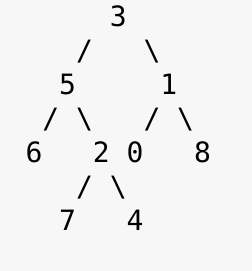


**Input**:
- Nodes `p = 7` and `q = 4`

**Steps**:
1. Start at the root node (3). Recurse into the left subtree (5) and right subtree (1).
2. At node 5:
   - Recurse into the left subtree (6). Return `None`.
   - Recurse into the right subtree (2). 
     - Recurse into the left subtree (7). Return 7.
     - Recurse into the right subtree (4). Return 4.
     - Since both left and right subtrees return non-`None`, return 2 as the LCA.
   - Return 2 to the root.
3. At node 1:
   - Recurse into both subtrees (0 and 8). Both return `None`.
   - Return `None` to the root.
4. Back at node 3:
   - Since the left subtree returns 2 and the right subtree returns `None`, propagate 2 upward as the LCA.

**Output**:
- The LCA is node 2.

#### 6. Wrap-Up
- Restate the approach:
  - By traversing the tree recursively and combining results from subtrees, we efficiently find the lowest common ancestor.
- Complexity Recap:
  - Time complexity is O(n), and space complexity is O(h).
- Ask for feedback or edge cases:
  - Does this implementation handle the requirements, or are there additional scenarios to consider?



In [30]:
def lowestCommonAncestor(root, p, q):
    if not root:
        return None
    
    left_res = lowestCommonAncestor(root.left, p, q)
    right_res = lowestCommonAncestor(root.right, p, q)
    
    if (left_res and right_res) or (root in [p, q]):
        return root
    else:
        return left_res or right_res

In [31]:
#       9
#    4     20
#  1  6  15   170

p = root.left.right  # Node with value 6
q = root.right.left  # Node with value 15

lowestCommonAncestor(root, p, q)

9

## 9. Basic Calculator

In [32]:
# Time --> O(n)
# Space --> O(1)
# Note --> Sign is changing in one lag, hence the correct calculation gets done. So when we encounter *, 
# the sign is still +
def calculator(s):
    if len(s) == 0:
        return 0
    
    current_number = 0
    last_number = 0
    result = 0
    sign = '+'
    
    for i in range(len(s)):
        current_char = s[i]
        
        if current_char.isdigit():
            current_number = current_number * 10 + int(current_char)
            
        if (not current_char.isdigit() and not current_char.isspace()) or i == len(s) - 1:
            if sign == '+' or sign == '-':
                result += last_number
                last_number = current_number if sign == '+' else -current_number
            elif sign == '*':
                last_number *= current_number
            elif sign == '/':
                last_number = int(last_number/current_number)
            
            sign = current_char
            current_number = 0
    result += last_number
    return result

In [33]:
s = "3+2*2"
calculator(s)

7

## 10. Simplify path

In [34]:
# time --> O(n)
# space --> O(n)
def simplifyPath(path):
    stack = []
    
    for portion in path.split("/"):
        if portion == "..":
            if stack:
                stack.pop()
        elif portion == "." or not portion:
            continue
        else:
            stack.append(portion)
    print(stack)
    final_str = "/" + "/".join(stack)
    return final_str

In [35]:
path = "/home//foo/"

simplifyPath(path)

['home', 'foo']


'/home/foo'

In [36]:
path.split("/")

['', 'home', '', 'foo', '']

In [37]:
path = "/home/user/Documents/../Pictures"

simplifyPath(path)

['home', 'user', 'Pictures']


'/home/user/Pictures'

In [38]:
path.split("/")

['', 'home', 'user', 'Documents', '..', 'Pictures']

## 11. Shortest path binary matrix

In [39]:
from collections import deque

directions = [[-1, 0], [-1, 1], [0, 1], [1, 1], [1, 0], [1, -1], [0, -1], [-1, -1]]

# time --> O(N)
# space --> O(N) where N is the number of cells in the grid.
def shortestPathBinaryMatrix(grid):
    if len(grid) == 0 or grid[0][0] != 0 or grid[-1][-1] != 0:
        return -1
    
    
    
    queue = [[0, 0, 1]]
    grid[0][0] = 1
    
    while queue:
        curr_row, curr_col, path_length = queue.pop(0)
        if curr_row == len(grid) - 1 and curr_col == len(grid[0]) - 1:
            return path_length
        
        for i in range(len(directions)):
            direction = directions[i]
            next_row = curr_row + direction[0]
            next_col = curr_col + direction[1]
            
            if next_row < 0 or next_col < 0 or next_row >= len(grid) or next_col >= len(grid[0]):
                continue
            
            if grid[next_row][next_col] == 0:
                queue.append([next_row, next_col, path_length + 1])
                grid[next_row][next_col] = 1
    return -1

In [40]:
grid = [[0,0,0],[1,1,0],[1,1,0]]

shortestPathBinaryMatrix(grid)

4

In [41]:
grid = [[0,1],[1,0]]
shortestPathBinaryMatrix(grid)

2

In [42]:
grid = [[1,1],[1,0]]
shortestPathBinaryMatrix(grid)

-1

## 12. Nested List Weighted Sum

In [43]:
# t --> O(n)
# s --> O(n)
def depthSum(nestedList):
    queue = nestedList
    
    depth = 1
    total = 0
    
    while queue:
        for i in range(len(queue)):
            nested = queue.pop(0)
            if nested.isInteger():
                total += nested.getInteger() * depth
            else:
                queue.extend(nested.getList())
        depth += 1
    return total

## 14. Dot product of sparse vectors

In [44]:
# List method
# Time --> O(n) for both
# space --> O(1) for both
class SparseVector:
    def __init__(self, nums):
        self.array = nums
    
    def dotProduct(self, vec):
        result = 0
        
        for num1, num2 in zip(self.array, vec.array):
            result += num1 * num2
        return result

In [45]:
nums1 = [1,0,0,2,3]
nums2 = [0,3,0,4,0]

v1 = SparseVector(nums1)
v2 = SparseVector(nums2)
v1.dotProduct(v2)

8

In [46]:
# Hash method
# Time --> O(n) for creating hashmap and O(L) for the dot product
# Space --> O(L) for hashmap, O(1) for dot product (n: len of array, L: no of non zero elements)
# IMPORTANT - META does not accept it
# Hashing/lookups, while on surface look efficient, for large sparse vectors, 
# hashing function takes up bulk of the computation
class SparseVector:
    def __init__(self, nums):
        self.nonzeros = {}
        for idx, num in enumerate(nums):
            if num != 0:
                self.nonzeros[idx] = num
    
    def dotProduct(self, vec):
        result = 0
        for idx, num in self.nonzeros.items():
            if idx in vec.nonzeros:
                result += num * vec.nonzeros[idx]
        return result

In [47]:
nums1 = [1,0,0,2,3]
nums2 = [0,3,0,4,0]

v1 = SparseVector(nums1)
v2 = SparseVector(nums2)
v1.dotProduct(v2)

8

In [48]:
# Two pointer method

class SparseVector:
    def __init__(self, nums):
        self.pairs = []
        
        for idx, num in enumerate(nums):
            if num != 0:
                self.pairs.append([idx, num])
    
    def dotProduct(self, vec):
        result = 0
        first = 0
        second = 0
        
        while first < len(self.pairs) and second < len(vec.pairs):
            if self.pairs[first][0] == vec.pairs[second][0]:
                result += self.pairs[first][1] * vec.pairs[second][1]
                first += 1
                second += 1
            elif self.pairs[first][0] < vec.pairs[second][0]:
                first += 1
            else:
                second += 1
        return result

In [49]:
nums1 = [1,0,0,2,3]
nums2 = [0,3,0,4,0]

v1 = SparseVector(nums1)
v2 = SparseVector(nums2)
v1.dotProduct(v2)

8

## 15. Minimum add to make parenthesis valid

In [50]:
# time --> O(n)
# space --> O(1)

def minAddToMakeValid(s):
    open_brackets = 0
    min_adds_required = 0
    
    for c in s:
        if c == '(':
            open_brackets += 1
        else:
            if open_brackets > 0:
                open_brackets -= 1
            else:
                min_adds_required += 1
    return min_adds_required + open_brackets

In [51]:
s = "((("
minAddToMakeValid(s)

3

In [52]:
s = "())"
minAddToMakeValid(s)

1

In [53]:
s = "()"
minAddToMakeValid(s)

0

## 16. Pow (x, n)

In [54]:
# Time --> O(logN) (at each recursive call, we reduce n by half)
# space --> O(logN)

def myPow(x, n):
    if n == 0:
        return 1
    
    if n < 0:
        return 1/myPow(x, -n)
    
    half = myPow(x, n // 2)
    
    if n % 2 == 0:
        return half * half
    else:
        return half * half * x

In [55]:
x = 2.0000
n = 10
myPow(x, n)

1024.0

In [56]:
x = 2.00000
n = -2

myPow(x, n)

0.25

## 17. Valid Palindrome

In [57]:
def isPalindrome(s):
    if len(s) <= 1:
        return True
    
    left = 0
    right = len(s) - 1
    
    while left < right:
        while left < right and not s[left].isalnum():
            left += 1
        while left < right and not s[right].isalnum():
            right -= 1
        
        if s[left].lower() != s[right].lower():
            return False
        
        left += 1
        right -= 1
        
    return True

In [58]:
s = "A man, a plan, a canal: Panama"
isPalindrome(s)

True

In [59]:
x = {1:4, 2:3, 3:5, 4:1}

sorted(x.items())

[(1, 4), (2, 3), (3, 5), (4, 1)]

## 18. Top K frequent elements

In [60]:
# brute force with heap
# time --> O(Nlogk)
# space --> O(N + k) (N for hashmap, k for heap)
from collections import Counter
import heapq

def topKFrequent(nums, k):
    if k == len(nums):
        return nums
    
    counter = Counter(nums)
    
    return heapq.nlargest(k, counter.keys(), key=counter.get)

In [61]:
nums = [1,1,1,2,2,3]
k = 2    

topKFrequent(nums, k)

[1, 2]

In [29]:
from collections import Counter
# time --> O(n)
# space --> O(n)
def topKFrequent(nums, k):
    # Step 1: Build the frequency map
    freq_map = Counter(nums)  # O(n)
    
    # Step 2: Convert the frequency map into a list of (element, frequency) tuples
    freq_list = list(freq_map.items())  # [(num, freq), ...]

    # Step 3: Define QuickSelect
    def quickSelect(left, right, k_smallest):
        if left == right:
            return
        
        if left < right:
            # Partition the array
            partitionIndex = partition(left, right)

            # Check if the pivot is at the correct position
            if partitionIndex == k_smallest:
                return
            elif partitionIndex < k_smallest:
                quickSelect(partitionIndex + 1, right, k_smallest)
            else:
                quickSelect(left, partitionIndex - 1, k_smallest)
    
    def partition(left, right):
        pivot_frequency = freq_list[right][1]
        partition_index = left
        for j in range(left, right):
            if freq_list[j][1] < pivot_frequency:  # Ascending order for frequencies
                freq_list[j], freq_list[partition_index] = freq_list[partition_index], freq_list[j]
                partition_index += 1
        freq_list[right], freq_list[partition_index] = freq_list[partition_index], freq_list[right]
        return partition_index
    
    # Step 4: Perform QuickSelect to partition the array
    n = len(freq_list)
    quickSelect(0, n - 1, n - k)
    
    print(freq_list)
    
    # Step 5: Return the top k elements
    return [freq_list[i][0] for i in range(n - k, n)]

# Example usage
nums = [1, 1, 1, 2, 2, 3, 3, 3, 3]
k = 2
print(topKFrequent(nums, k))  # Output: [1, 2]


[(2, 2), (1, 3), (3, 4)]
[1, 3]


## 19. Diameter of binary tree

In [9]:
#       9
#    4     20
#  1  6  15   170

# time --> O(n)
# space --> O(n)
def diameterOfBinaryTree(root):
    
    diameter = 0
    
    def longest_path(node):
        if not node:
            return 0
        nonlocal diameter
        left_path = longest_path(node.left)
        right_path = longest_path(node.right)
        diameter = max(diameter, left_path + right_path)
        return max(left_path, right_path) + 1
    
    longest_path(root)
    return diameter

In [10]:
diameterOfBinaryTree(root)

4

## 20. Lowest Common Ancestor of a binary tree - III

### Step-by-Step Approach for Finding the Lowest Common Ancestor (LCA) in a Binary Tree with Parent Pointers

#### 1. Clarify the Problem
- The goal is to find the **lowest common ancestor (LCA)** of two nodes \(p\) and \(q\) in a binary tree.
- The tree nodes have a pointer to their parent, so we can traverse upward from each node.
- Clarify edge cases:
  - Can \(p\) and \(q\) be the same node?
  - Is it guaranteed that both \(p\) and \(q\) exist in the tree?
  - What should the function return if either \(p\) or \(q\) is `None`?

---

#### 2. Plan the Approach
We use a two-pointer technique to find the LCA efficiently:

1. **Key Idea**:
   - Start with two pointers, `p1` and `p2`, at nodes \(p\) and \(q\), respectively.
   - Move each pointer upward to its parent until the pointers meet. The node where they meet is the LCA.

2. **Handle Different Heights**:
   - If the tree is unbalanced and the paths to \(p\) and \(q\) differ in length, this approach ensures both pointers traverse the same number of steps:
     - When a pointer reaches the root, it is redirected to the other node (\(q\) or \(p\)).

3. **Why This Works**:
   - By switching paths, the two pointers eventually align on the same node, which is the LCA.
   - If \(p\) and \(q\) are on the same path, the first common node is the LCA.

---

#### 3. Complexity Analysis
- **Time Complexity**:
  - \(O(h)\), where \(h\) is the height of the tree, because each pointer traverses at most \(2h\) steps (one traversal to the root and one traversal back down).
- **Space Complexity**:
  - \(O(1)\), as no additional data structures are used.

---

#### 4. Example Walkthrough
**Example 1**:
- Input: 
  - \(p = 5\), \(q = 1\)
  - Tree:
    ```
           3
          / \
         5   1
        / \
       6   2
    ```
- Steps:
  1. Start with `p1 = 5` and `p2 = 1`.
  2. Move `p1` and `p2` upward:
     - `p1` → `3` (parent of \(5\)).
     - `p2` → `3` (parent of \(1\)).
  3. `p1` and `p2` meet at `3`.
- **Output**: `3`

---

**Example 2**:
- Input: 
  - \(p = 6\), \(q = 2\)
  - Tree:
    ```
           3
          / \
         5   1
        / \
       6   2
    ```
- Steps:
  1. Start with `p1 = 6` and `p2 = 2`.
  2. Move `p1` and `p2` upward:
     - `p1` → `5` (parent of \(6\)).
     - `p2` → `5` (parent of \(2\)).
  3. `p1` and `p2` meet at `5`.
- **Output**: `5`

---

#### 5. Edge Cases
1. **Nodes Are the Same**:
   - Input: \(p = q = 5\).
   - Output: \(5\) (A node is its own ancestor).

2. **Root as LCA**:
   - Input: \(p = 6\), \(q = 1\).
   - Output: \(3\) (The root is the LCA for nodes on different subtrees).

3. **One Node is the Ancestor of the Other**:
   - Input: \(p = 5\), \(q = 6\).
   - Output: \(5\) (A node is the LCA of itself and its descendant).

---

#### 6. Wrap-Up
- Restate the approach:
  - Use two pointers that traverse upward to the root, switching paths when reaching the end of their respective paths.
- Complexity Recap:
  - Time complexity is \(O(h)\), and space complexity is \(O(1)\).
- Ask for feedback or additional edge cases:
  - "Does this implementation handle all edge cases? Are there additional scenarios to consider?"


In [65]:
# time --> O(h)
# space --> O(1)
def lowestCommonAncestor(p, q):
    p1 = p
    p2 = q
    
    while p1 != p2:
        p1 = p1.parent if p1.parent else q
        p2 = p2.parent if p2.parent else p
    return p1 # can return p2 too

## 21. Building with an ocean view

There are n buildings in a line. You are given an integer array heights of size n that represents the heights of the buildings in the line.

The ocean is to the right of the buildings. A building has an ocean view if the building can see the ocean without obstructions. Formally, a building has an ocean view if all the buildings to its right have a smaller height.

Return a list of indices (0-indexed) of buildings that have an ocean view, sorted in increasing order.

In [66]:
## Brute force
# Take every building and compare every building on its right. O(n^2)

## Linear Iteration
# time --> O(n)
# space --> O(n)
def findBuildings(heights):
    answer = []
    
    for i in range(len(heights)):
        print(f"i:{i}")
        print(f"Before: {answer}")
        # If the current building is taller, 
        # it will block the shorter building's ocean view to its left.
        # So we pop all the shorter buildings that have been added before.
        while answer and heights[answer[-1]] <= heights[i]:
            answer.pop()
        answer.append(i)
        print(f"After: {answer}")
    return answer

In [67]:
heights = [4,2,3,1]
findBuildings(heights)

i:0
Before: []
After: [0]
i:1
Before: [0]
After: [0, 1]
i:2
Before: [0, 1]
After: [0, 2]
i:3
Before: [0, 2]
After: [0, 2, 3]


[0, 2, 3]

In [68]:
## Answer with space optimization
# time --> O(n)
# space --> O(1)
def findBuildings(heights):
    answer = []
    max_height = -1
    
    for current in reversed(range(len(heights))):
        if max_height < heights[current]:
            answer.append(current)
            max_height = heights[current]
    answer.reverse()
    return answer

In [69]:
heights = [4,2,3,1]
findBuildings(heights)

[0, 2, 3]

## 22. LRU Cache

Design a data structure that follows the constraints of a Least Recently Used (LRU) cache.

Implement the LRUCache class:

* LRUCache(int capacity) Initialize the LRU cache with positive size capacity.
* int get(int key) Return the value of the key if the key exists, otherwise return -1.
* void put(int key, int value) Update the value of the key if the key exists. Otherwise, add the key-value pair to the cache. If the number of keys exceeds the capacity from this operation, evict the least recently used key.

The functions get and put must each run in O(1) average time complexity.

### Note

Python 3.7+ dictionary is ordered dictionary already, but without move to end or other extra methods.

Keys are in the order in which they are added.
So least recently used element should be forced to be added "now" so its at the bottom.
i.e delete and then add if already exists or just add. Latest at bottom

To pop the oldest, i.e at the top, just use the first key. Do not use list(dict.keys())[0] as it becomes O(n), instead use next(iter(dict)) so you only get the first key!

In [70]:
class LRUCache:
    def __init__(self, capacity):
        self.odict = {}
        self.capacity = capacity
        
    def get(self, key):
        if key not in self.odict:
            return - 1
        
        self.odict[key] = self.odict.pop(key)
        return self.odict[key]
    
    def put(self, key, value):
        self.odict.pop(key, None)
        self.odict[key] = value
        
        if len(self.odict) > self.capacity:
            self.odict.pop(next(iter(self.odict)))

In [71]:
# Your LRUCache object will be instantiated and called as such:
capacity = 2
lRUCache = LRUCache(capacity)
lRUCache.put(1, 1)
lRUCache.put(2, 2)
print(lRUCache.get(1))

lRUCache.put(3, 3)
print(lRUCache.get(2))

lRUCache.put(4, 4)
print(lRUCache.get(1))

print(lRUCache.get(3))
print(lRUCache.get(4))

1
-1
-1
3
4


## 23. Find Peak Element

In [13]:
# time --> O(logn)
# space --> O(1)
def findPeakElement(nums):
    left = 0
    right = len(nums) - 1
    
    while left < right:
        mid = (left + right) // 2
        
        if nums[mid] > nums[mid + 1]:
            right = mid
        else:
            left = mid + 1
    return left

In [14]:
nums = [1,2,1,3,5,6,4]
findPeakElement(nums)

5

In [74]:
# left = 0, right = 6
# left = 4, right = 6
# left = 4, right = 4

## 24. Range Sum of BST

In [75]:
def rangeSumBST(root, low, high):
    if not root:
        return 0
    
    result = 0
    
    queue = [root]
    
    while queue:
        currNode = queue.pop(0)
        if currNode:
            if low <= currNode.val <= high:
                result += currNode.val
            if low < currNode.val:
                queue.append(currNode.left)
            if currNode.val < high:
                queue.append(currNode.right)
    return result
                

In [76]:
#       9
#    4     20
#  1  6  15   170

rangeSumBST(root, 10, 30)

35

## 25. Interval List Intersections

In [83]:
# Time --> O(M + N)
# Space --> O(M + N)
def intervalIntersection(firstList, secondList):
    answer = []
    first = 0
    second = 0
    
    while first < len(firstList) and second < len(secondList):
        low = max(firstList[first][0], secondList[second][0])
        hi = min(firstList[first][1], secondList[second][1])
        
        if low <= hi:
            answer.append([low, hi])
            
        if firstList[first][1] < secondList[second][1]:
            first += 1
        else:
            second += 1
    return answer

In [84]:
firstList = [[0,2],[5,10],[13,23],[24,25]]
secondList = [[1,5],[8,12],[15,24],[25,26]]

intervalIntersection(firstList, secondList)

[[1, 2], [5, 5], [8, 10], [15, 23], [24, 24], [25, 25]]

## 26. Find first and last position of element in a sorted array

In [85]:
# time --> O(logN)
# space --> O(1) (because of tail recursion)
def binarySearch(nums, left, right, target):
    mid = (left + right) // 2
    
    if left <= right:
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            left = mid + 1
            return binarySearch(nums, left, right, target)
        else:
            right = mid - 1
            return binarySearch(nums, left, right, target)
        
    return -1

def searchRange(nums, target):
    if len(nums) == 0:
        return [-1, -1]
    
    firstPosition = binarySearch(nums, 0, len(nums) - 1, target)
    
    if firstPosition == -1:
        return [-1, -1]
    
    startPosition = firstPosition
    endPosition = firstPosition
    tempL = 0
    tempR = 0
    
    while startPosition != -1:
        tempL = startPosition
        startPosition = binarySearch(nums, 0, startPosition - 1, target)
    startPosition = tempL
    
    while endPosition != -1:
        tempR = endPosition
        endPosition = binarySearch(nums, endPosition + 1, len(nums) - 1, target)
    endPosition = tempR
    
    return [startPosition, endPosition]

In [86]:
nums = [5,7,7,8,8,10]
target = 8

searchRange(nums, target)

[3, 4]

## 27. Merge Intervals

In [95]:
# When we change last, we are modifying merged_intervals in place
# time --> O(nlogn)
# space -> O(logn)
# Different form: "Assume an array of video watch times, where each segment represents the times a user 
# started and stopped a video, calculate the total number of unique minutes watched"
def merge(intervals):
    if not intervals:
        return []
    
    intervals.sort(key=lambda x:x[0])
    
    merged_intervals = [intervals[0]]
    
    for current in intervals[1:]:
        last = merged_intervals[-1]
        
        if current[0] <= last[1]:
            last[1] = max(last[1], current[1])
        else:
            merged_intervals.append(current)
    return merged_intervals

In [96]:
intervals = [[1,3],[2,6],[8,10],[15,18]]
merge(intervals)

[[1, 6], [8, 10], [15, 18]]

## 28. Sum root to leaf numbers

You are given the root of a binary tree containing digits from 0 to 9 only.

Each root-to-leaf path in the tree represents a number.

For example, the root-to-leaf path 1 -> 2 -> 3 represents the number 123.

Return the total sum of all root-to-leaf numbers. Test cases are generated so that the answer will fit in a 32-bit integer.

In [99]:
def run():
    root = Node(5)
    root.insert_nodes([3, 7, 2, 4, 6, 8], root)
    bfs_result = root.bfs(root=root)
    dfs_inorder = root.DFSInorder(root)
    dfs_preorder = root.DFSPreOrder(root)
    dfs_postorder = root.DFSPostOrder(root)
    return root, bfs_result, dfs_inorder, dfs_preorder, dfs_postorder

root_2, bfs_result, dfs_inorder, dfs_preorder, dfs_postorder = run()

In [100]:
#       5
#    3     7
#  2  4  6   8

# time --> O(N)
# space --> O(H)

def sumNumbers(root):
    if not root:
        return 0
    
    queue = [[root, root.val]]
    
    total = 0
    
    while queue:
        curr_node, path_sum = queue.pop(0)
        
        if not curr_node.left and not curr_node.right:
            total += path_sum
            
        if curr_node.left:
            queue.append([curr_node.left, path_sum * 10 + curr_node.left.val])
            
        if curr_node.right:
            queue.append([curr_node.right, path_sum * 10 + curr_node.right.val])
            
    return total

In [102]:
sumNumbers(root_2)

2220

In [103]:
532 + 534 + 576 + 578

2220

In [105]:
# Morris algorithm 

# time --> O(N)
# space --> O(1)

def sumNumbers(root) -> int:
    root_to_leaf = curr_number = 0

    while root:
        # If there is a left child,
        # then compute the predecessor.
        # If there is no link predecessor.right = root --> set it.
        # If there is a link predecessor.right = root --> break it.
        if root.left:
            # Predecessor node is one step to the left
            # and then to the right till you can.
            predecessor = root.left
            steps = 1
            while predecessor.right and predecessor.right is not root:
                predecessor = predecessor.right
                steps += 1

            # Set link predecessor.right = root
            # and go to explore the left subtree
            if predecessor.right is None:
                curr_number = curr_number * 10 + root.val
                predecessor.right = root
                root = root.left
            # Break the link predecessor.right = root
            # Once the link is broken,
            # it's time to change subtree and go to the right
            else:
                # If you're on the leaf, update the sum
                if predecessor.left is None:
                    root_to_leaf += curr_number
                # This part of tree is explored, backtrack
                for _ in range(steps):
                    curr_number //= 10
                predecessor.right = None
                root = root.right

        # If there is no left child
        # then just go right.
        else:
            curr_number = curr_number * 10 + root.val
            # if you're on the leaf, update the sum
            if root.right is None:
                root_to_leaf += curr_number
            root = root.right

    return root_to_leaf

In [106]:
sumNumbers(root_2)

2220

In [8]:
from functools import reduce

# Template to create node list
class ListNode:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

# Function to print the linked list
def printList(head):
    if not head:
        return
    while head:
        print(head.val, end=" -> ")
        head = head.next
    print("None")

# Function to create a linked list from a list of values
def createLinkedList(values):
    return reduce(lambda acc, val: ListNode(val, acc), reversed(values), None)

# Create multiple linked lists
list1 = createLinkedList([1, 4, 5])
list2 = createLinkedList([1, 3, 4])
list3 = createLinkedList([2, 6])

# Print the linked lists
print("List 1:")
printList(list1)

print("\nList 2:")
printList(list2)

print("\nList 3:")
printList(list3)

List 1:
1 -> 4 -> 5 -> None

List 2:
1 -> 3 -> 4 -> None

List 3:
2 -> 6 -> None


## 29. Merge K-sorted Lists (Hard)

You are given an array of k linked-lists lists, each linked-list is sorted in ascending order.

Merge all the linked-lists into one sorted linked-list and return it.

In [4]:
# Brute force
# Time --> O(nLogn)
# Space --> O(n)
def mergeKLists(lists):
    nodes = []
    dummy = ListNode(0)
    current = dummy
    
    for l in lists:
        while l:
            nodes.append(l.val)
            l = l.next
    print(nodes)
            
    for x in sorted(nodes):
        current.next = ListNode(x)
        current = current.next
    return dummy.next

In [5]:
mergedList = mergeKLists([list1, list2, list3])
print("\nMerged List:")
printList(mergedList)

[1, 4, 5, 1, 3, 4, 2, 6]

Merged List:
1 -> 1 -> 2 -> 3 -> 4 -> 4 -> 5 -> 6 -> None


In [9]:
# Min heap / Priority queue
# Time --> O(NLogK) (N is the total number of elements across all lists and K is the number of lists.)
# space --> O(K) (heap)
import heapq

def mergeKLists(lists):
    if not lists or len(lists) == 0:
        return None

    min_heap = []
    
    # Step 1: Push the head of each list into the heap
    for i, l in enumerate(lists):
        if l:  # Only push non-null nodes
            heapq.heappush(min_heap, (l.val, i, l))  # (value, list_index, node)
    
    # Step 2: Merge the lists
    dummy = ListNode(0)
    current = dummy
    
    while min_heap:
        # Pop the smallest element from the heap
        val, i, node = heapq.heappop(min_heap)
        
        # Add the smallest node to the merged list
        current.next = node
        current = current.next
        
        # If there's a next node in the same list, push it into the heap
        if node.next:
            heapq.heappush(min_heap, (node.next.val, i, node.next))
    
    return dummy.next

In [10]:
mergedList = mergeKLists([list1, list2, list3])
print("\nMerged List:")
printList(mergedList)


Merged List:
1 -> 1 -> 2 -> 3 -> 4 -> 4 -> 5 -> 6 -> None


## 30. Custom Sort String

You are given two strings order and s. All the characters of order are unique and were sorted in some custom order previously.

Permute the characters of s so that they match the order that order was sorted. More specifically, if a character x occurs before a character y in order, then x should occur before y in the permuted string.

Return any permutation of s that satisfies this property.

In [16]:
from collections import Counter

# time --> O(N)
# space --> O(N)

def customSortString(order, s):
    freq = Counter(s)
    
    result = []
    
    for letter in order:
        if letter in freq:
            result.append(letter * freq[letter])
            del freq[letter]
            
    for letter, count in freq.items():
        result.append(letter * count)
        
    return "".join(result)

In [17]:
order = "bcafg"
s = "abbcd"

customSortString(order, s)

'bbcad'

## 31. Moving average from data stream

In [136]:
from collections import deque

# Time --> O(1)
# Space --> O(N) (N is size of the window)

class MovingAverage:
    def __init__(self, size):
        self.size = size
        self.count = 0
        self.queue = deque()
        self.window_sum = 0
        
    def next(self, val):
        self.count += 1
        
        self.queue.append(val)
        
        tail = self.queue.popleft() if self.count > self.size else 0
        
        self.window_sum = self.window_sum - tail + val
        
        return (self.window_sum)/(min(self.count, self.size))

In [137]:
movingAverage = MovingAverage(3)
print(movingAverage.next(1))
print(movingAverage.next(10))
print(movingAverage.next(3))
print(movingAverage.next(5))

1.0
5.5
4.666666666666667
6.0


## 32. K Closest points to origin

In [138]:
## Brute force 

# Time --> O(nLogn)
# Space --> O(logn)

def kClosest(points, k):
    def squared_distance(point):
        return point[0]**2 + point[1]**2
    
    points.sort(key=squared_distance)
    return points[:k]

In [139]:
points = [[3,3],[5,-1],[-2,4]]
k = 2
kClosest(points, k)

[[3, 3], [-2, 4]]

In [150]:
# quickselect
# Time --> O(n), worst case O(n^2)
# space --> O(1)
def kClosest(points, k):
    distances = [x**2 + y**2 for x, y in points]
    quickSelect(points, distances, 0, len(points) - 1, k - 1)
    return points[:k]

def quickSelect(nums, distances, left, right, k_smallest):
    if left == right:
        return
    
    partitionIndex = partition(nums, distances, left, right)
    
    if partitionIndex == k_smallest:
        return
    elif partitionIndex < k_smallest:
        return quickSelect(nums, distances, partitionIndex + 1, right, k_smallest)
    else:
        return quickSelect(nums, distances, left, partitionIndex - 1, k_smallest)
    
def partition(nums, distances, left, right):
    partitionIndex = left
    pivotElement = distances[right]
    
    for j in range(left, right):
        if distances[j] <= pivotElement:
            distances[j], distances[partitionIndex] = distances[partitionIndex], distances[j]
            nums[j], nums[partitionIndex] = nums[partitionIndex], nums[j]
            partitionIndex += 1
    distances[right], distances[partitionIndex] = distances[partitionIndex], distances[right]
    nums[right], nums[partitionIndex] = nums[partitionIndex], nums[right]
    return partitionIndex

In [151]:
points = [[3, 3], [5, -1], [-2, 4]]
k = 2
print(kClosest(points, k))  # Output: [[3, 3], [-2, 4]]

[[3, 3], [-2, 4]]


## 33. Next Permutation

A permutation of an array of integers is an arrangement of its members into a sequence or linear order.

For example, for arr = [1,2,3], the following are all the permutations of arr: [1,2,3], [1,3,2], [2, 1, 3], [2, 3, 1], [3,1,2], [3,2,1].
The next permutation of an array of integers is the next lexicographically greater permutation of its integer. More formally, if all the permutations of the array are sorted in one container according to their lexicographical order, then the next permutation of that array is the permutation that follows it in the sorted container. If such arrangement is not possible, the array must be rearranged as the lowest possible order (i.e., sorted in ascending order).

* For example, the next permutation of arr = [1,2,3] is [1,3,2].
* Similarly, the next permutation of arr = [2,3,1] is [3,1,2].
* While the next permutation of arr = [3,2,1] is [1,2,3] because [3,2,1] does not have a lexicographical larger rearrangement.

In [154]:
# time --> O(n)
# space --> O(1)

def nextPermutation(nums):
    n = len(nums)
    if n <= 1:
        return
    
    # Step 1: Find the first decreasing element
    i = n - 2
    while i >= 0 and nums[i] >= nums[i + 1]:
        i -= 1

    if i >= 0:  # Step 2: Find the smallest element greater than nums[i]
        j = n - 1
        while nums[j] <= nums[i]:
            j -= 1
        # Step 3: Swap nums[i] and nums[j]
        nums[i], nums[j] = nums[j], nums[i]
    
    # Step 4: Reverse the subarray nums[i+1:]
    left, right = i + 1, n - 1
    while left < right:
        nums[left], nums[right] = nums[right], nums[left]
        left += 1
        right -= 1

In [155]:
nums = [2, 3, 6, 5, 4, 1]
nextPermutation(nums)
nums

[2, 4, 1, 3, 5, 6]

## 34. Trapping rain water (Hard)

In [156]:
# Brute force
# time --> O(n^2)
# space --> O(1)
def rain_water_brute_force(heights):
    total_water = 0
    
    for p in range(len(heights)):
        leftP = p
        rightP = p
        maxLeft = 0
        maxRight = 0
        
        while leftP >= 0:
            maxLeft = max(maxLeft, heights[leftP])
            leftP -= 1
        
        while rightP < len(heights):
            maxRight = max(maxRight, heights[rightP])
            rightP += 1
            
        currentWater = min(maxLeft, maxRight) - heights[p]
        
        if currentWater > 0:
            total_water += currentWater
    return total_water

In [157]:
elevationArray = [0,1,0,2,1,0,3,1,0,1,2]
rain_water_brute_force(elevationArray)

8

In [164]:
# time --> O(n)
# space --> O(1)
def rain_water_better(heights):
    leftP = 0
    rightP = len(heights) - 1
    maxLeft = 0
    maxRight = 0
    totalWater = 0
    
    while leftP < rightP:
        if heights[leftP] < heights[rightP]:
            if heights[leftP] < maxLeft:
                totalWater += maxLeft - heights[leftP]
            else:
                maxLeft = heights[leftP]
            leftP += 1
        else:
            if heights[rightP] < maxRight:
                totalWater += maxRight - heights[rightP]
            else:
                maxRight = heights[rightP]
            rightP -= 1
    return totalWater

In [165]:
elevationArray = [0,1,0,2,1,0,3,1,0,1,2]
rain_water_better(elevationArray)

8

## 35. Clone Graph

Given a reference of a node in a connected undirected graph.

Return a deep copy (clone) of the graph.

Each node in the graph contains a value (int) and a list (List[Node]) of its neighbors.


Test case format:

For simplicity, each node's value is the same as the node's index (1-indexed). For example, the first node with val == 1, the second node with val == 2, and so on. The graph is represented in the test case using an adjacency list.

An adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.

The given node will always be the first node with val = 1. You must return the copy of the given node as a reference to the cloned graph.

In [166]:
# time --> O(V+E) (V: number of nodes, E: number of edges)
# space --> O(N)

def cloneGraph(node):
    if not node:
        return None

    visited = {}

    def dfs(currNode):
        if currNode in visited:
            return visited[currNode]

        clone = Node(currNode.val)
        visited[currNode] = clone

        for neighbor in currNode.neighbors:
            clone.neighbors.append(dfs(neighbor))

        return clone

    return dfs(node)

## 36. Two Sum



In [170]:
def twoSum(nums, target):
    if len(nums) <= 1:
        return None
    
    hashMap = {}
    
    for i in range(len(nums)):
        if nums[i] not in hashMap.keys():
            ntf = target - nums[i]
            hashMap[ntf] = i
        else:
            return [hashMap[nums[i]], i]
    return -1   

In [182]:
nums = [2,7,11,15]
target = 9
twoSum(nums, target)

[0, 1]

## 37. Palindrome number

In [18]:
# time --> O(d) (d: number of digits)
# space --> O(d) (str representation holds a space of d)
def isPalindrome(x):
    return str(x) == str(x)[::-1]

In [19]:
isPalindrome(121)

True

In [183]:
# time --> O(logn)
# space --> O(1)

def isPalindrome(x: int) -> bool:
    # Negative numbers and numbers ending in 0 (except 0 itself) are not palindromes
    if x < 0 or (x % 10 == 0 and x != 0):
        return False

    reversed_half = 0
    while x > reversed_half:
        # Extract the last digit and append it to reversed_half
        reversed_half = reversed_half * 10 + x % 10
        # Remove the last digit from x
        x //= 10

    # Check if the number is a palindrome
    # For odd-length numbers, discard the middle digit using reversed_half // 10
    return x == reversed_half or x == reversed_half // 10

In [184]:
isPalindrome(121)

True

## 38. Generate Parenthesis

In [194]:
# time --> O(2^n)
# space --> O(n)

def generateParenthesis(n):
    def dfs(left, right, s):
        if len(s) == 2 * n:
            res.append(s)
            return
    
        if left < n:
            dfs(left + 1, right, s + '(')
            
        if right < left:
            dfs(left, right + 1, s + ')')
            
    res = []
    dfs(0, 0, '')
    return res

In [195]:
n = 3
generateParenthesis(n)

['((()))', '(()())', '(())()', '()(())', '()()()']

## 39. Subarray sum equals K

In [200]:
# time --> O(n)
# space --> O(n)
def subarraySum(nums, k):
    count = 0
    cumulative_sum = 0
    prefix_sums = defaultdict(int)
    prefix_sums[0] = 1  # Initialize with sum 0 having one occurrence

    for num in nums:
        cumulative_sum += num

        # Check if (cumulative_sum - k) exists in prefix_sums
        if cumulative_sum - k in prefix_sums:
            count += prefix_sums[cumulative_sum - k]

        # Update the prefix_sums dictionary
        prefix_sums[cumulative_sum] += 1

    return count

In [201]:
nums = [1,2,3]
k = 3

subarraySum(nums, k)

2

## 40. Kth missing positive number

Given an array arr of positive integers sorted in a strictly increasing order, and an integer k.

Return the kth positive integer that is missing from this array.

In [210]:
# Brute force
# time --> O(n)
# space --> O(1)
def findKthPositive(arr, k):
    for num in arr:
        #print(num)
        if num <= k:
            k += 1
        elif num > k:
            break
    return k

In [211]:
arr = [2,3,4,7,11]
k = 5
findKthPositive(arr, k)

9

We need a way to check on how many positive integers are missing before the given array element to use binary search. 

To do that, let's compare the input array
[2, 3, 4, 7, 11] with an array with no missing integers: [1, 2, 3, 4, 5]. 

The number of missing integers is a simple difference between the corresponding elements of these two arrays:

* Before 2, there is 2 - 1 = 1 missing integer.

* Before 3, there is 3 - 2 = 1 missing integer.

* Before 4, there is 4 - 3 = 1 missing integer.

* Before 7, there are 7 - 4 = 3 missing integers.

* Before 11, there are 11 - 5 = 6 missing integers.

The number of positive integers which are missing before the arr[idx] is equal to **arr[idx] - idx - 1**.



In [212]:
# time --> O(logn)
# space 
def findKthPositive(arr, k):
    left = 0
    right = len(arr) - 1
    
    while left <= right:
        mid = (left + right) // 2
        # If number of positive integers
        # which are missing before arr[pivot]
        # is less than k -->
        # continue to search on the right.
        if arr[mid] - mid - 1 < k:
            left = mid + 1
        else:
            right = mid - 1
    # At the end of the loop, left = right + 1,
    # and the kth missing is in-between arr[right] and arr[left].
    # The number of integers missing before arr[right] is
    # arr[right] - right - 1 -->
    # the number to return is
    # arr[right] + k - (arr[right] - right - 1) = k + left
    return left + k

In [213]:
arr = [2,3,4,7,11]
k = 5
findKthPositive(arr, k)

9

## 41. Binary tree right side view

In [214]:
# time --> O(n)
# space --> O(h)

# For BFS, a full and complete tree gives the worst Big O. For DFS, a highly left skewed tree gives the worst
# Big O. So if it is skewed, it's better to use BFS and if it is a full and complete tree, it's better to use DFS.
# In BFS, the worst O space is O(w), where w is the fattest width of the tree and for DFS, the worst O space is 
# O(H) where H is the height of the tree


def rightSideView(root):
    if not root:
        return []
    
    result = []
    queue = [root]
    
    while queue:
        queueLength = len(queue)
        counter = 0
        
        while counter < queueLength:
            currNode = queue.pop(0)
            
            if currNode.left:
                queue.append(currNode.left)
            
            if currNode.right:
                queue.append(currNode.right)
                
            counter += 1
        
        result.append(currNode.val)
    return result

In [215]:
rightSideView(root)

[9, 20, 170]

## 42. Closest Binary search tree value

Given the root of a binary search tree and a target value, return the value in the BST that is closest to the target. If there are multiple answers, print the smallest.



In [221]:
#       9
#    4     20
#  1  6  15   170

# time --> O(N)
# space --> O(N)
def closestValue(root, target):
    if not root:
        return None
    
    result = float('inf')
    
    queue = [root]
    
    while queue:
        currNode = queue.pop(0)
                
        if (
            abs(currNode.val - target) < abs(result - target) or
            (abs(currNode.val - target) == abs(result - target) and currNode.val < result)
            ):
            result = currNode.val
            
        if currNode.left:
            queue.append(currNode.left)
            
        if currNode.right:
            queue.append(currNode.right)
            
    return result

In [222]:
closestValue(root, 18)

20

In [223]:
# Binary search
# time --> O(H)
# space --> O(1)
def closestValue(root, target):
    closest = root.val
    
    while root:
        closest = min(closest, root.val, key = lambda x: (abs(target - x), x))
        root = root.left if target < root.val else root.right
    return closest

In [224]:
closestValue(root, 18)

20

## 43. Longest common prefix

In [229]:
# time --> O(S) (S = m.n where m is the number of strings and n is the length of the shortest string)
# space --> O(m + n) (prefix stores n and set stores m. zip is o(1) as it does lazily)

def longestCommonPrefix(strs):
    prefix = []
    
    for x in zip(*strs):
        if len(set(x)) == 1:
            prefix.append(x[0])
        else:
            break
    return "".join(prefix)

In [230]:
strs = ["flower","flow","flight"]

longestCommonPrefix(strs)

'fl'

## 44. Valid Number

In [234]:
# DFA method
# time --> O(n)
# space --> O(1)
def isNumber(s: str) -> bool:
        # Define the states and valid transitions
        dfa = {
            0: {"sign": 1, "digit": 2, "dot": 3},      # Start
            1: {"digit": 2, "dot": 3},                 # Sign
            2: {"digit": 2, "dot": 4, "exp": 5},       # Integer
            3: {"digit": 4},                           # Decimal without leading digits
            4: {"digit": 4, "exp": 5},                 # Decimal with digits
            5: {"sign": 6, "digit": 7},                # Exponent
            6: {"digit": 7},                           # Exponent Sign
            7: {"digit": 7},                           # Exponent Digits
        }
        
        # Initial state
        state = 0

        # Character type mapping
        def char_type(ch):
            if ch in "+-":
                return "sign"
            if ch.isdigit():
                return "digit"
            if ch == ".":
                return "dot"
            if ch in "eE":
                return "exp"
            return None

        # Process the input string
        for char in s.strip():
            char_class = char_type(char)
            if char_class not in dfa[state]:
                return False
            state = dfa[state][char_class]

        # Valid end states
        return state in {2, 4, 7}
        

In [239]:
isNumber("3.14e+10")

True

In [237]:
# regex
# time --> O(n)
# space --> O(1)

import re

def isNumber(s: str) -> bool:
    # Regular expression to validate the number
    pattern = re.compile(r"""
        ^                   # Start of string
        [+-]?               # Optional sign
        (                   # Start of main number
            (\d+\.\d*) |    # Case 1: Digits followed by a dot and optional digits
            (\.\d+) |       # Case 2: Dot followed by digits
            (\d+)           # Case 3: Only digits
        )                   # End of main number
        (                   # Optional exponent
            [eE][+-]?\d+    # Exponent with optional sign and digits
        )?                  # Exponent is optional
        $                   # End of string
    """, re.VERBOSE)

    return bool(pattern.match(s))


In [241]:
isNumber("3.14e+10")

True

## 45. Best time to buy and sell stocks

In [242]:
## Brute force
# time --> O(n^2)
# space --> O(n)
def maxProfit(prices):
    max_profit = 0
    
    for i in range(len(prices) - 1):
        for j in range(i, len(prices)):
            profit = prices[j] - prices[i]
            max_profit = max(profit, max_profit)
    return max_profit


In [243]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

5

In [244]:
prices = [7,6,4,3,1]
maxProfit(prices)

0

In [245]:
# time --> O(n)
# space --> O(1)
def maxProfit(prices):
    minPrice = float("inf")
    maxProfit = 0
    
    for i in range(len(prices)):
        if prices[i] < minPrice:
            minPrice = prices[i]
        
        if prices[i] - minPrice > maxProfit:
            maxProfit = prices[i] - minPrice
    return maxProfit

In [246]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

5

## 46. Copy list with random pointers

In [247]:
# time --> O(n)
# space --> O(n)

class Solution:
    def __init__(self):
        self.visitedHash = {}
    def copyRandomList(self, head):
        if not head:
            return None
        
        if head in self.visitedHash:
            return self.visitedHash[head]
        
        node = Node(head.val, 0, 0)
        
        self.visitedHash[head] = node
        
        node.next = self.copyRandomList(head.next)
        node.random = self.copyRandomList(head.random)
        
        return node

## 47. Maximum Swap

You are given an integer num. You can swap two digits at most once to get the maximum valued number.

Return the maximum valued number you can get.

 

Example 1:

Input: num = 2736
Output: 7236
Explanation: Swap the number 2 and the number 7.


In [258]:
# Time --> O(n)
# space --> O(n)

def maximumSwap(num:int):
    digits = list(str(num))
    
    rightmost = {int(d): i for i, d in enumerate(digits)}
    
    for i, d in enumerate(digits):
        for larger_digit in range(9, int(d), -1):
            if rightmost.get(larger_digit, -1) > i:
                digits[i], digits[rightmost[larger_digit]] = digits[rightmost[larger_digit]], digits[i]
                return int("".join(digits))
    
    # if no digit could be swapped
    return num

In [260]:
num = 2739
maximumSwap(num)

9732

## 48. Accounts merge

In [5]:
from collections import defaultdict
# time --> O(NKlogNK) (N: Number of accounts, K: maximum length of an account)
# space --> O(NK)
def accountsMerge(accounts):
    visited = [False] * len(accounts)
    email_accounts_map = defaultdict(list)
    result = []
    
    for i, account in enumerate(accounts):
        for j in range(1, len(account)):
            email = account[j]
            email_accounts_map[email].append(i)
        
    print(email_accounts_map)
            
    def dfs(i, emails):
        if visited[i]:
            return
        
        visited[i] = True
        
        for j in range(1, len(accounts[i])):
            email = accounts[i][j]
            emails.add(email)
            for neighbors in email_accounts_map[email]:
                dfs(neighbors, emails)
    
    for i, account in enumerate(accounts):
        if visited[i]:
            continue
        name, emails = account[0], set()
        dfs(i, emails)
        result.append([name] + sorted(emails))
    return result

In [6]:
accounts = [["John","johnsmith@mail.com","john_newyork@mail.com"],["John","johnsmith@mail.com","john00@mail.com"],
            ["Mary","mary@mail.com"],["John","johnnybravo@mail.com"]]

accountsMerge(accounts)

defaultdict(<class 'list'>, {'johnsmith@mail.com': [0, 1], 'john_newyork@mail.com': [0], 'john00@mail.com': [1], 'mary@mail.com': [2], 'johnnybravo@mail.com': [3]})


[['John', 'john00@mail.com', 'john_newyork@mail.com', 'johnsmith@mail.com'],
 ['Mary', 'mary@mail.com'],
 ['John', 'johnnybravo@mail.com']]

## 49. Insert into a sorted circular Linked List

Now, the tricky part of this problem is to sort out different cases that our algorithm should deal with within the loop, and then design a concise logic to handle them sound and properly. Here we break it down into three general cases.

* Case 1). The value of new node sits between the minimal and maximal values of the current list. As a result, it should be inserted within the list.

* Case 2). The value of new node goes beyond the minimal and maximal values of the current list, either less than the minimal value or greater than the maximal value. In either case, the new node should be added right after the tail node (i.e. the node with the maximal value of the list).

* Case 3). Finally, there is one case that does not fall into any of the above two cases. This is the case where the list contains uniform values.

In [27]:
# time --> O(n)
# space --> O(1)

def insert(head, insertVal):

    if head == None:
        newNode = Node(insertVal, None)
        newNode.next = newNode
        return newNode

    prev, curr = head, head.next
    toInsert = False

    while True:

        if prev.val <= insertVal <= curr.val:
            # Case #1.
            toInsert = True
        elif prev.val > curr.val:
            # Case #2. where we locate the tail element
            # 'prev' points to the tail, i.e. the largest element!
            if insertVal >= prev.val or insertVal <= curr.val:
                toInsert = True

        if toInsert:
            prev.next = Node(insertVal, curr)
            # mission accomplished
            return head

        prev, curr = curr, curr.next
        # loop condition
        if prev == head:
            break
    # Case #3.
    # did not insert the node in the loop
    prev.next = Node(insertVal, curr)
    return head

## 50. Minimum Number of Operations to Move All Balls to Each Box

In [34]:
# time --> O(n)
# space --> O(n)
def minOperations(boxes):
    n = len(boxes)
    answer = [0]*n
    
    operations = 0
    balls = 0
    
    for i in range(n):
        answer[i] += operations
        balls += int(boxes[i])
        operations += balls
    
    operations = 0
    balls = 0
    for i in range(n-1, -1, -1):
        answer[i] += operations
        balls += int(boxes[i])
        operations += balls
        
    return answer

In [35]:
boxes = "001011"
minOperations(boxes)

[11, 8, 5, 4, 3, 4]

## 51. Add Strings

Facebook interviewers like this question and propose it in four main variations. The choice of algorithm should be based on the input format:

1. Strings (the current problem).

Use schoolbook digit-by-digit addition. Note, that to fit into constant space is not possible for languages with immutable strings, for example, for Java and Python. Here are two examples:

  * Add Binary: sum two binary strings. (https://leetcode.com/articles/add-binary/)

  * Add Strings: sum two non-negative numbers in a string representation without converting them to integers directly. (https://leetcode.com/problems/add-strings/)

2. Integers.

Usually, the interviewer would ask you to implement a sum without using + and - operators. Use the bit manipulation approach. Here is an example:

  * Sum of Two Integers: Sum two integers without using + and - operators. (https://leetcode.com/articles/sum-of-two-integers/)
  
3. Arrays.
The same textbook addition. Here is an example:

  * Add to Array Form of Integer. (https://leetcode.com/articles/add-to-array-form-of-integer/)

4. Linked Lists.
Sentinel Head + Textbook Addition. Here are some examples:

  * Plus One. (https://leetcode.com/articles/plus-one/)

  * Add Two Numbers. (https://leetcode.com/articles/add-two-numbers/)

  * Add Two Numbers II. (https://leetcode.com/problems/add-two-numbers-ii/)

In [43]:
def addStrings(num1, num2):
    result = []
    carry = 0
    
    p1 = len(num1) - 1
    p2 = len(num2) - 1
    
    while p1 >= 0 or p2 >= 0:
        x1 = ord(num1[p1]) - ord('0') if p1 >= 0 else 0
        x2 = ord(num2[p2]) - ord('0') if p2 >= 0 else 0
        
        value = (x1 + x2 + carry) % 10
        carry = (x1 + x2 + carry) // 10
        
        result.append(value)
        
        p1 -= 1
        p2 -= 1
        
    if carry:
        result.append(carry)
        
    return ''.join(str(x) for x in result[::-1])

In [44]:
num1 = "11"
num2 = "123"

addStrings(num1, num2)

'134'

## 52. Vertical Order traversal of a binary tree

The difference between this and Question 6 is that in question 6, we could have unsorted arrays in the sub arrays themselves. But here, those also needs to be sorted

In [45]:
from collections import defaultdict

# time --> O(n + mklogk) (n: number of nodes in the tree, k: number of nodes in the column, m is the number of columns)
# space --> O(n)
def verticalTraversal(root):
    if not root:
        return []
    
    columnTable = defaultdict(list)
    queue = [[root, 0, 0]]
    minCol = 0
    maxCol = 0
    
    while queue:
        currNode, currCol, currRow = queue.pop(0)
        
        if currNode:
            columnTable[currCol].append((currRow, currNode.val))
            minCol = min(minCol, currCol)
            maxCol = max(maxCol, currCol)
            
            queue.append((currNode.left, currCol - 1, currRow + 1))
            queue.append((currNode.right, currCol + 1, currRow + 1))
            
    
    sortedResult = []
    
    for col in range(minCol, maxCol + 1):
        sortedColumn = sorted(columnTable[col], key=lambda x: (x[0], x[1]))
        sortedResult.append([val for _, val in sortedColumn])
        
    return sortedResult

In [46]:
verticalTraversal(root)

[[1], [4], [9, 6, 15], [20], [170]]

## 53. Continuous Subarray sum

Given an integer array nums and an integer k, return true if nums has a good subarray or false otherwise.

A good subarray is a subarray where:

* its length is at least two, and
* the sum of the elements of the subarray is a multiple of k.

Note that:

* A subarray is a contiguous part of the array.
* An integer x is a multiple of k if there exists an integer n such that x = n * k. 0 is always a multiple of k.

Example 1:

Input: nums = [23,2,4,6,7], k = 6
Output: true
Explanation: [2, 4] is a continuous subarray of size 2 whose elements sum up to 6.


Example 2:

Input: nums = [23,2,6,4,7], k = 6
Output: true
Explanation: [23, 2, 6, 4, 7] is an continuous subarray of size 5 whose elements sum up to 42.
42 is a multiple of 6 because 42 = 7 * 6 and 7 is an integer.

### Explanations

### Step-by-Step Approach for Checking Subarray Sum Divisible by \(k\)

#### 1. Clarify the Problem
- The goal is to determine whether the input array `nums` contains a **contiguous subarray** of length at least 2 whose sum is divisible by \(k\).
- Key points:
  - The subarray sum is divisible by \(k\) if:
    \[
    \text{(prefix sum)} \% k = 0
    \]
  - A remainder seen earlier indicates that a subarray with the required property exists between the previous occurrence and the current index.
- Ask clarifying questions:
  - What should be returned if \(k = 0\)? (Usually undefined, but it can be clarified.)
  - Can the array contain negative numbers? (Yes, modulo works for negatives in Python.)

---

#### 2. Plan the Approach

We solve this using a **prefix sum modulo** approach:
1. **Prefix Sum with Modulo**:
   - Compute the cumulative sum (`prefix_mod`) modulo \(k\) at each index. If the same modulo is seen twice, it indicates a subarray sum divisible by \(k\) exists between those indices.

2. **Hash Map for Efficient Lookup**:
   - Use a dictionary `mod_seen` to store the first index where each remainder (modulo \(k\)) was seen.
   - Initialize `mod_seen` with `{0: -1}` to handle cases where a valid subarray starts at index 0.

3. **Check Subarray Length**:
   - When the current remainder is found in `mod_seen`, ensure that the subarray length is at least 2.

---

#### 3. Complexity Analysis

- **Time Complexity**:
  - \(O(n)\): Each element is processed once, and dictionary operations are \(O(1)\) on average.
- **Space Complexity**:
  - \(O(n)\): Space is required to store the `mod_seen` dictionary.

---



In [15]:
# time --> O(n)
# space --> O(n)

def checkSubarraySum(nums, k):
    prefix_mod = 0
    mod_seen = {0:-1}
    
    for i in range(len(nums)):
        prefix_mod = (prefix_mod + nums[i]) % k
        #print(prefix_mod, mod_seen)
        if prefix_mod in mod_seen:
            if (i - mod_seen[prefix_mod]) > 1:
                return True
        else:
            mod_seen[prefix_mod] = i
    return False

In [16]:
#prefix_mod = 0, mod_seen = {0:-1}
#prefix_mod = 5, mod_seen = {0:-1, 5:0, }
#prefix_mod = 1, mod_seen = {0:-1, 5:0, 1:1}
#prefix_mod = 5, it is in mod_seen. i = 2 and mod_seen[prefix_mod] = 0. So i - mod_seen[prefix_mod] = 2 (>1)
#So, True
nums = [23,2,4,6,7]
k = 6

checkSubarraySum(nums, k)

True

In [17]:
nums = [-23,2,6,4,7]
k = 16
checkSubarraySum(nums, k)

False

## 54. Min Stack

In [18]:
# time --> O(1) for all
# space --> O(n) (Worst case is that all the operations are push)
class MinStack:
    def __init__(self):
        self.min_stack = []
        self.stack = []
        
    def push(self, val):
        self.stack.append(val)
        
        if not self.min_stack or val <= self.min_stack[-1]:
            self.min_stack.append(val)
            
    def pop(self):
        if self.min_stack[-1] == self.stack[-1]:
            self.min_stack.pop()
        self.stack.pop()
        
    def top(self):
        return self.stack[-1]
    
    def getMin(self):
        return self.min_stack[-1]

In [21]:
minStack = MinStack()
minStack.push(-2)
minStack.push(0)
minStack.push(-3)
print(minStack.getMin())
minStack.pop()
print(minStack.top())
print(minStack.getMin())

-3
0
-2


## 55. Unique Length-3 Palindromic Subsequences

There is only one possible form a palindrome with length 3 can take. The first and last character must be the same, and the character in the middle can be anything (including the same character as the first/last character).

In [40]:
# time --> O(n)
# space --> O(1)
def countPalindromicSubsequence(s):
    answer = 0
    letters = set(s)
    
    for letter in letters:
        i, j = s.index(letter), s.rindex(letter)
        print(i, j)
        between = set()
        
        for k in range(i + 1, j):
            between.add(s[k])
        print(between)
        answer += len(between)
        
    return answer

In [41]:
s = "bbcbaba"
countPalindromicSubsequence(s)

2 2
set()
0 5
{'c', 'b', 'a'}
4 6
{'b'}


4

In [42]:
s = "aabca"
countPalindromicSubsequence(s)

3 3
set()
2 2
set()
0 4
{'c', 'b', 'a'}


3

## 56. Maximum score after splitting a string

Given a string s of zeros and ones, return the maximum score after splitting the string into two non-empty substrings (i.e. left substring and right substring).

The score after splitting a string is the number of zeros in the left substring plus the number of ones in the right substring.

 

Example 1:

Input: s = "011101"

Output: 5 

Explanation: 

All possible ways of splitting s into two non-empty substrings are:

left = "0" and right = "11101", score = 1 + 4 = 5 

left = "01" and right = "1101", score = 1 + 3 = 4 

left = "011" and right = "101", score = 1 + 2 = 3 

left = "0111" and right = "01", score = 1 + 1 = 2 

left = "01110" and right = "1", score = 2 + 1 = 3

### Brute force

For a given i, we iterate on the indices of s from 0 to i and count how many times 0 occurs. We then iterate on the indices from i + 1 until the last index and count how many times 1 occurs. The sum of these counts represents the score for the current split, and we take the maximum of all scores.




In [45]:
# time --> O(n) (but two passes, one for s.count and one for loop)
# space --> O(1)
def maxScore(s):
    ones = s.count("1")
    ans = 0
    zeros = 0
    
    for i in range(len(s) - 1):
        if s[i] == '1':
            ones -= 1
        else:
            zeros += 1
        
        ans = max(ans, zeros + ones)
    
    return ans

In [46]:
s = "011101"
maxScore(s)

5

In [49]:
# one pass
# time --> O(n) (one pass)
# space --> O(1)
def maxScore(s):
    ones = 0
    zeros = 0
    best = float('-inf')
    
    for i in range(len(s) - 1):
        if s[i] == '1':
            ones += 1
        else:
            zeros += 1
            
        best = max(best, zeros - ones)
        
    if s[-1] == "1":
        ones += 1
    
    return best + ones

In [50]:
s = "011101"
maxScore(s)

5

## 57. Search in rotated sorted array II

There is an integer array nums sorted in non-decreasing order (not necessarily with distinct values).

Before being passed to your function, nums is rotated at an unknown pivot index k (0 <= k < nums.length) such that the resulting array is [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]] (0-indexed). For example, [0,1,2,4,4,4,5,6,6,7] might be rotated at pivot index 5 and become [4,5,6,6,7,0,1,2,4,4].

Given the array nums after the rotation and an integer target, return true if target is in nums, or false if it is not in nums.

You must decrease the overall operation steps as much as possible.

 

Example 1:

Input: nums = [2,5,6,0,0,1,2], target = 0
Output: true
Example 2:

Input: nums = [2,5,6,0,0,1,2], target = 3
Output: false
 

In [51]:
# Time --> O(logn) (worst case O(N))
# space --> O(1)

def search(nums, target):
    left, right = 0, len(nums) - 1

    while left <= right:
        mid = (left + right) // 2

        # If target is found
        if nums[mid] == target:
            return True

        # Handle duplicates
        if nums[left] == nums[mid] == nums[right]:
            left += 1
            right -= 1
        # Left side is sorted
        elif nums[left] <= nums[mid]:
            if nums[left] <= target < nums[mid]:  # Target is in the sorted left side
                right = mid - 1
            else:  # Target is in the rotated right side
                left = mid + 1
        # Right side is sorted
        else:
            if nums[mid] < target <= nums[right]:  # Target is in the sorted right side
                left = mid + 1
            else:  # Target is in the rotated left side
                right = mid - 1

    return False


In [56]:
nums = [2,5,6,0,1,2]
target = 0
search(nums, target)

True

In [53]:
nums = [2,5,6,0,0,1,2]
target = 3
search(nums, target)

False

## 58.Two Sum II

**Difference between Two Sum**: Here the array is sorted

Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number. Let these two numbers be numbers[index1] and numbers[index2] where 1 <= index1 < index2 <= numbers.length.

Return the indices of the two numbers, index1 and index2, **added by one** as an integer array [index1, index2] of length 2.

The tests are generated such that there is exactly one solution. You may not use the same element twice.

Your solution must use only constant extra space.

 

Example 1:

Input: numbers = [2,7,11,15], target = 9
Output: [1,2]
Explanation: The sum of 2 and 7 is 9. Therefore, index1 = 1, index2 = 2. We return [1, 2].
 

In [59]:
# time --> O(n)
# space --> O(1)

def twoSum(numbers, target):
    left = 0
    right = len(numbers) - 1
    
    while left < right:
        total = numbers[left] + numbers[right]
        
        if total == target:
            return [left + 1, right + 1]
        elif total < target:
            left += 1
        else:
            right -= 1
    return [-1, -1]

In [58]:
numbers = [2,7,11,15]
target = 9
twoSum(numbers, target)

[1, 2]

## 59. Three Sum

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

 

Example 1:

Input: nums = [-1,0,1,2,-1,-4]

Output: [[-1,-1,2],[-1,0,1]]

Explanation: 

nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.

nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.

nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.

The distinct triplets are [-1,0,1] and [-1,-1,2].

Notice that the order of the output and the order of the triplets does not matter.

In [62]:
# time --> O(n^2)
# space --> O(n)

def threeSum(nums):
    res = []
    nums.sort()
    
    for i in range(len(nums)):
        if nums[i] > 0:
            break
        if i == 0 or nums[i - 1] != nums[i]:
            twoSum(nums, i, res)
    
    return res

def twoSum(nums, i, res):
    left = i + 1
    right = len(nums) - 1
    
    while left < right:
        total = nums[left] + nums[i] + nums[right]
        
        if total < 0:
            left += 1
        elif total > 0:
            right -= 1
        else:
            res.append([nums[left], nums[i], nums[right]])
            left += 1
            right -= 1
            
            while left < right and nums[left] == nums[left - 1]:
                left += 1

In [63]:
nums = [-1,0,1,2,-1,-4]
threeSum(nums)

[[-1, -1, 2], [0, -1, 1]]

## 60. Max Consecutive Ones III

We will use sliding window technique.

In [13]:
def longestOnes(nums, k):
    left = 0
    for right in range(len(nums)):
        # If we included a zero in the window we reduce the value of k.
        # Since k is the maximum zeros allowed in a window.
        if nums[right] == 0:
            k -= 1
        # A negative k denotes we have consumed all allowed flips and window has
        # more than allowed zeros, thus increment left pointer by 1 to keep the window size same.
        if k < 0:
            # If the left element to be thrown out is zero we increase k.
            if nums[left] == 0:
                k += 1
            left += 1
    return right - left + 1

In [12]:
nums = [1,1,1,0,0,0,1,1,1,1,0]
k = 2

longestOnes(nums, k)

6

## 61. Remove duplicates from sorted array

In [79]:
# time --> O(n)
# space --> O(1)
def removeDuplicates(nums):
    insert_index = 1

    for i in range(1, len(nums)):
        if nums[i] != nums[i - 1]:
            nums[insert_index] = nums[i]

            insert_index += 1
    # print(nums)
    return insert_index

In [80]:
nums = [0,0,1,1,1,2,2,3,3,4]
removeDuplicates(nums)

5

## 62. Maximum Subarray

Given an integer array nums, find the subarray with the largest sum, and return its sum.

 

Example 1:

Input: nums = [-2,1,-3,4,-1,2,1,-5,4]

Output: 6

Explanation: The subarray [4,-1,2,1] has the largest sum 6.


In [77]:
def maxSubArray(nums):
    current_subarray = nums[0]
    max_subarray = nums[0]
    
    for i in range(1, len(nums)):
        current_subarray = max(nums[i], current_subarray + nums[i])
        max_subarray = max(max_subarray, current_subarray)
    return max_subarray

In [78]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
maxSubArray(nums)

6

## 63. Add Binary

Here XOR is a key as well because it's a sum of two binaries without taking carry into account.


To find the current carry is quite easy as well, it's AND of two input numbers, shifted one bit to the left.


Now the problem is reduced: one has to find the sum of answers without carry and carry. It's the same problem - to sum two numbers, and hence one could solve it in a loop with the condition statement "while carry is not equal to zero".

Algorithm

* Convert a and b into integers x and y, x will be used to keep an answer, and y for the carry.

* While carry is nonzero: y != 0:

  * Current answer without carry is XOR of x and y: answer = x^y.

  * Current carry is left-shifted AND of x and y: carry = (x & y) << 1.

  * Job is done, prepare the next loop: x = answer, y = carry.

* Return x in the binary form.

In [95]:
# time --> O(n + m) (n and m are lengths of a and b)
# space --> O(max(n, m)) to keep the answer

def addBinary(a, b):
    x, y = int(a, 2), int(b, 2)
    while y:
        answer = x^y
        carry = (x & y) << 1
        x, y = answer, carry
    return bin(x)[2:] # to get rid of "0b" prefix to return the final binary result.

In [96]:
a = "11"
b = "1"

addBinary(a, b)

'100'

## 64. Sort colors

Given an array nums with n objects colored red, white, or blue, sort them in-place so that objects of the same color are adjacent, with the colors in the order red, white, and blue.

We will use the integers 0, 1, and 2 to represent the color red, white, and blue, respectively.

You must solve this problem without using the library's sort function.

 

Example 1:

Input: nums = [2,0,2,1,1,0]

Output: [0,0,1,1,2,2]

Example 2:

Input: nums = [2,0,1]

Output: [0,1,2]
 

In [97]:
# time --> O(n)
# space --> O(1)

def sortColors(nums):
    left = 0
    right = len(nums) - 1
    curr = 0
    
    while curr <= right:
        if nums[curr] == 0:
            nums[left], nums[curr] = nums[curr], nums[left]
            left += 1
            curr += 1
        elif nums[curr] == 2:
            nums[right], nums[curr] = nums[curr], nums[right]
            right -= 1
        else:
            curr += 1

In [99]:
nums = [2,0,2,1,1,0]
sortColors(nums)
nums

[0, 0, 1, 1, 2, 2]

## 65. Maximum Average Subarray

You are given an integer array nums consisting of n elements, and an integer k.

Find a contiguous subarray whose length is equal to k that has the maximum average value and return this value. Any answer with a calculation error less than 10-5 will be accepted.

 

Example 1:

Input: nums = [1,12,-5,-6,50,3], k = 4

Output: 12.75000

Explanation: Maximum average is (12 - 5 - 6 + 50) / 4 = 51 / 4 = 12.75


In [102]:
# time --> O(n)
# space --> O(1)

def findMaxAverage(nums, k):
    current_sum = sum(nums[:k])
    max_sum = current_sum
    
    for i in range(k, len(nums)):
        current_sum += nums[i] - nums[i - k]
        max_sum = max(max_sum, current_sum)
    return max_sum / k

In [103]:
nums = [1,12,-5,-6,50,3]
k = 4

findMaxAverage(nums, k)

12.75

## 66. Palindromic Substrings

Given a string s, return the number of palindromic substrings in it.

A string is a palindrome when it reads the same backward as forward.

A substring is a contiguous sequence of characters within the string.

 

Example 1:

Input: s = "abc"

Output: 3

Explanation: Three palindromic strings: "a", "b", "c".



In [104]:
# time --> O(n^2)
# space --> O(1)

def countSubstrings(s):
    def countPalindromesAroundCenter(ss, low, high):
        count = 0
        
        while low >= 0 and high < len(ss):
            if ss[low] != ss[high]:
                break
            
            low -= 1
            high += 1
            count += 1
        return count
    
    ans = 0
    
    for i in range(len(s)):
        ans += countPalindromesAroundCenter(s, i, i)
        ans += countPalindromesAroundCenter(s, i, i + 1)
    return ans

In [105]:
s = "abc"
countSubstrings(s)

3

In [106]:
s = "aaa"
countSubstrings(s)

6

## 67. Majority Element

Given an array nums of size n, return the majority element.

The majority element is the element that appears more than ⌊n / 2⌋ times. You may assume that the majority element always exists in the array.

 
Example 1:

Input: nums = [3,2,3]

Output: 3

In [109]:
# hashmap
# time --> O(n)
# space --> O(n)
from collections import Counter

def majorityElement(nums):
    counts = Counter(nums)
    
    return max(counts.keys(), key=counts.get)

In [110]:
nums = [3,2,3]
majorityElement(nums)

3

In [112]:
# sorting
# time --> O(nlogn)
# space --> O(1)
def majorityElement( nums):
    nums.sort()
    return nums[len(nums) // 2]

In [113]:
# Boyer Moore Voting algorithm
# Time --> O(n)
# space --> O(1)

def majorityElement(nums):
    count = 0
    candidate = None
    
    for num in nums:
        if count == 0:
            candidate = num
        count += 1 if num == candidate else -1
    return candidate

In [114]:
# Initial State:
# count = 0, candidate = None

# Iteration 1:
# Current number: 3
# count == 0: Set candidate = 3
# Increment count: count = 1

# Iteration 2:
# Current number: 2
# 2 != candidate (3): Decrement count: count = 0

# Iteration 3:
# Current number: 2
# count == 0: Set candidate = 2
# Increment count: count = 1

# Iteration 4:
# Current number: 3
# 3 != candidate (2): Decrement count: count = 0

# Iteration 5:
# Current number: 3
# count == 0: Set candidate = 3
# Increment count: count = 1

# Iteration 6:
# Current number: 3
# 3 == candidate (3): Increment count: count = 2

# Final State:
# candidate = 3
# Return 3 as the majority element.

nums = [3, 2, 2, 3, 3, 3]
majorityElement(nums)

3

## 68. Counting words with a given prefix

You are given an array of strings words and a string pref.

Return the number of strings in words that contain pref as a prefix.

A prefix of a string s is any leading contiguous substring of s.

 

Example 1:

Input: words = ["pay","attention","practice","attend"], pref = "at"

Output: 2

Explanation: The 2 strings that contain "at" as a prefix are: "attention" and "attend".


In [115]:
# time --> O(mn) (n be the length of the input array words and m be the length of the prefix string pref.)
# space --> O(1)
def prefixCount(words, pref):
    return sum(word.startswith(pref) for word in words)

In [116]:
words = ["pay","attention","practice","attend"]
pref = "at"
prefixCount(words, pref)

2

## 69. Group Strings

Perform the following shift operations on a string:

**Right shift:** Replace every letter with the successive letter of the English alphabet, where 'z' is replaced by 'a'. For example, "abc" can be right-shifted to "bcd" or "xyz" can be right-shifted to "yza".

**Left shift:** Replace every letter with the preceding letter of the English alphabet, where 'a' is replaced by 'z'. For example, "bcd" can be left-shifted to "abc" or "yza" can be left-shifted to "xyz".
We can keep shifting the string in both directions to form an endless shifting sequence.

For example, shift "abc" to form the sequence: ... <-> "abc" <-> "bcd" <-> ... <-> "xyz" <-> "yza" <-> .... <-> "zab" <-> "abc" <-> ...
You are given an array of strings strings, group together all strings[i] that belong to the same shifting sequence. You may return the answer in any order.

 

Example 1:

Input: strings = ["abc","bcd","acef","xyz","az","ba","a","z"]

Output: [["acef"],["a","z"],["abc","bcd","xyz"],["az","ba"]]

In [121]:
from collections import defaultdict

# time --> O(nm) where n is the number of strings and m is the average length of a string.
# space --> O(nm) to store groups and patterns

def groupStrings(strings):
    def calculatePattern(s: str) -> tuple:
        # Calculate the shifting pattern of the string
        return tuple((ord(s[i]) - ord(s[i - 1])) % 26 for i in range(1, len(s)))

    # Dictionary to group strings by their pattern
    groups = defaultdict(list)

    for string in strings:
        pattern = calculatePattern(string)
        groups[pattern].append(string)

    return list(groups.values())

In [122]:
strings = ["abc", "bcd", "acef", "xyz", "az", "ba", "a", "z"]
groupStrings(strings)

[['abc', 'bcd', 'xyz'], ['acef'], ['az', 'ba'], ['a', 'z']]

## 70. All nodes distances in a binary tree

Given the root of a binary tree, the value of a target node target, and an integer k, return an array of the values of all nodes that have a distance k from the target node.

You can return the answer in any order.


Input: root = [3,5,1,6,2,0,8,null,null,7,4], target = 5, k = 2

Output: [7,4,1]

Explanation: The nodes that are a distance 2 from the target node (with value 5) have values 7, 4, and 1.

In [123]:
# time --> O(n)
# space --> O(n)

def distanceK(root, target, k):
    def add_parent(curr, parent):
        if curr:
            curr.parent = parent
            add_parent(curr.left, curr)
            add_parent(curr.right, curr)
            
    add_parent(root, None)
    
    answer = []
    visited = set()
    
    def dfs(curr, distance):
        if not curr or curr in visited:
            return
        
        visited.add(curr)
        
        if distance == 0:
            answer.append(curr.val)
            return
        
        dfs(curr.parent, distance - 1)
        dfs(curr.left, distance - 1)
        dfs(curr.right, distance - 1)
    
    dfs(target, k)
    
    return answer

## 71. Diagonal Traverse

Given an m x n matrix mat, return an array of all the elements of the array in a diagonal order.

Input: mat = [[1,2,3],[4,5,6],[7,8,9]]

Output: [1,2,4,7,5,3,6,8,9]

In [126]:
# time --> O(m x n)
# space --> O(m x n)
# trick: to understand that for all elements on a diagonal the value of i + j is same.
def findDiagonalOrder(mat):
    hashMap = {}
    
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            if i + j not in hashMap:
                hashMap[i + j] = [mat[i][j]]
            else:
                hashMap[i + j].append(mat[i][j])
    
    ans = []
    
    for item in hashMap.items():
        if item[0] % 2 == 0:
            [ans.append(x) for x in item[1][::-1]]
        else:
            [ans.append(x) for x in item[1]]
    return ans

In [127]:
mat = [[1,2,3],[4,5,6],[7,8,9]]
findDiagonalOrder(mat)

[1, 2, 4, 7, 5, 3, 6, 8, 9]

## 72. Add two Linked List

In [128]:
# time --> O(max(m, n))
# space --> O(1)
def addTwoNumbers(l1, l2):
    dummy_head = ListNode(0)
    curr = dummy_head
    carry = 0
    
    while l1 != None or l2 != None or carry != 0:
        l1_val = l1.val if l1 else 0
        l2_val = l2.val if l2 else 0
        
        column_sum = l1_val + l2_val + carry
        
        carry = column_sum // 10
        
        new_node = ListNode(column_sum % 10)
        
        curr.next = new_node
        
        curr = new_node
        
        l1 = l1.next if l1 else None
        l2 = l2.next if l2 else None
    
    return dummy_head.next

## 73. Roman to Integer

Trick - If left value is lesser than the next right value, we subtract them

In [129]:
def romanToInt(s):
    values = {
        "I": 1,
        "V": 5,
        "X": 10,
        "L": 50,
        "C": 100,
        "D": 500,
        "M": 1000,
    }
    
    i = 0
    total = 0
    
    while i < len(s):
        if i + 1 < len(s) and values[s[i]] < values[s[i + 1]]:
            total += values[s[i + 1]] - values[s[i]]
            i += 2
        else:
            total += values[s[i]]
            i += 1
    return total

In [130]:
s = "LVIII"
romanToInt(s)

58

## 74. Median of two sorted arrays (HARD)

### Step-by-Step Approach for Finding the Median of Two Sorted Arrays

#### 1. Clarify the Problem
- The goal is to find the median of two sorted arrays `nums1` and `nums2`.
- The arrays may have different sizes, and the solution should work in `O(log(m + n))` time complexity.
- Ask clarifying questions:
  - Are the arrays guaranteed to be non-empty? (Typically, yes, but it can vary.)
  - Can the arrays have duplicate elements? (Yes.)
  - Should the median be a floating-point number? (Yes.)

---

#### 2. Plan the Approach

The problem is solved using a **binary search** on the smaller of the two arrays. The key idea is to find a **correct partition** of the combined sorted array:

1. **Key Definitions**:
   - The "left partition" consists of all elements before the partition in both arrays.
   - The "right partition" consists of all elements after the partition.
   - For a correct partition:
     ```
     max(left) <= min(right)
     ```

2. **Binary Search**:
   - Perform binary search on the smaller array `nums1` to find the correct partition:
     - Partition the first array:
       ```
       partitionX = (low + high) // 2
       ```
     - Partition the second array:
       ```
       partitionY = (len(nums1) + len(nums2) + 1) // 2 - partitionX
       ```

3. **Handle Edge Cases**:
   - If a partition index is out of bounds, treat the missing side as `-inf` or `+inf`.

4. **Median Calculation**:
   - If the total number of elements is odd:
     ```
     median = max(maxX, maxY)
     ```
   - If the total number of elements is even:
     ```
     median = (max(maxX, maxY) + min(minX, minY)) / 2
     ```

---

#### 3. Complexity Analysis
- **Time Complexity**:
  - Binary search is performed on the smaller array, so the time complexity is `O(log(min(m, n)))`.
- **Space Complexity**:
  - `O(1)`, as no additional space is used.

---

#### 4. Example Walkthrough

**Example 1**:
- **Input**: `nums1 = [1, 3]`, `nums2 = [2]`

1. **Initialization**:
   - Identify the smaller array: Swap arrays → `nums1 = [2]`, `nums2 = [1, 3]`.
   - Binary search bounds: `low = 0`, `high = 1`.

2. **First Iteration**:
   - `partitionX = 0`, `partitionY = 2`.
   - `maxX = -inf`, `minX = 2`.
   - `maxY = 3`, `minY = inf`.
   - Condition not satisfied, adjust `low = 1`.

3. **Second Iteration**:
   - `partitionX = 1`, `partitionY = 1`.
   - `maxX = 2`, `minX = inf`.
   - `maxY = 1`, `minY = 3`.
   - Condition satisfied.

4. **Median Calculation**:
   - Total elements: `3` (odd).
   - `median = max(2, 1) = 2`.

**Output**: `2.0`

---

**Example 2**:
- **Input**: `nums1 = [1, 2]`, `nums2 = [3, 4]`

1. **Initialization**:
   - Identify the smaller array: No swap needed.
   - Binary search bounds: `low = 0`, `high = 2`.

2. **First Iteration**:
   - `partitionX = 1`, `partitionY = 1`.
   - `maxX = 1`, `minX = 2`.
   - `maxY = 3`, `minY = 4`.
   - Condition not satisfied, adjust `low = 2`.

3. **Second Iteration**:
   - `partitionX = 2`, `partitionY = 0`.
   - `maxX = 2`, `minX = inf`.
   - `maxY = -inf`, `minY = 3`.
   - Condition satisfied.

4. **Median Calculation**:
   - Total elements: `4` (even).
   - `median = (max(2, -inf) + min(inf, 3)) / 2 = (2 + 3) / 2 = 2.5`.

**Output**: `2.5`

---

#### 5. Edge Cases
1. **One Empty Array**:
   - Input: `nums1 = []`, `nums2 = [1]`
   - Output: `1.0`
2. **Single Element Arrays**:
   - Input: `nums1 = [1]`, `nums2 = [2]`
   - Output: `1.5`
3. **All Elements in One Array**:
   - Input: `nums1 = [1, 2, 3]`, `nums2 = [4, 5, 6]`
   - Output: `3.5`

---

#### 6. Wrap-Up
- Restate the approach:
  - Use binary search to partition the smaller array, ensuring `O(log(min(m, n)))` time complexity.
- Complexity Recap:
  - Time complexity is `O(log(min(m, n)))`, and space complexity is `O(1)`.
- Ask for feedback or edge cases:
  - "Does this solution handle the requirements? Are there additional scenarios you'd like me to test?"


In [133]:
# time --> O(log(min(m, n)))
# space --> O(1)

def findMedianSortedArrays(nums1, nums2):
    if len(nums1) > len(nums2):
        nums1, nums2 = nums2, nums1
        
    x, y = len(nums1), len(nums2)
    low, high = 0, x
    
    while low <= high:
        partitionX = (low + high) // 2
        partitionY = (x + y + 1) // 2 - partitionX
        
        maxX = float('-inf') if partitionX == 0 else nums1[partitionX - 1]
        minX = float('inf') if partitionX == x else nums1[partitionX]
        
        maxY = float('-inf') if partitionY == 0 else nums2[partitionY - 1]
        minY = float('inf') if partitionY == y else nums2[partitionY]
        
        if maxX <= minY and maxY <= minX:
            if (x + y) % 2 == 0:
                return (max(maxX, maxY) + min(minX, minY)) / 2
            else:
                return max(maxX, maxY)
        elif maxX > minY:
            high = partitionX - 1
        else:
            low = partitionX + 1

In [134]:
nums1 = [1,3]
nums2 = [2]
findMedianSortedArrays(nums1, nums2)

2

In [135]:
nums1 = [1,2]
nums2 = [3,4]
findMedianSortedArrays(nums1, nums2)

2.5

## 75. Count and Say

For those not understanding what the question is asking: Here is a better explanation:

* 1 - Start with "1" as the base case;
* 2 - input "n" is how many times you need to make a conversion minus 1 - So if n is 5, convert 4 times.
* 3 - A conversion is like this -
---

* Conversion 1 - Starting with "1" - I see "one 1", so the new String becomes "11".
* Conversion 2 - Now I see "11", so I see "two 1s", so the next String is "21".
* Conversion 3 - I have "21" - so I see "one 2 and one 1", so we have "1211"
* Conversion 4 - I have "1211", so I see " one 1 and one 2 and two 1", therefore the final answer is "111221".

In [138]:
import re
# time --> O(4**(n/3))
# space --> O(4**(n/3))
def countAndSay(n: int) -> str:
    s = "1"
    for _ in range(n - 1):
        # m.group(0) is the entire match, m.group(1) is its first digit
        s = re.sub(
            r"(.)\1*", lambda m: str(len(m.group(0))) + m.group(1), s
        )
    return s

In [139]:
countAndSay(4)

'1211'

## 76. Remove nth node from the end of a Linked List

Instead of one pointer, we could use two pointers. The first pointer advances the list by n+1 steps from the beginning, while the second pointer starts from the beginning of the list. 

Now, both pointers are exactly separated by n nodes apart. We maintain this constant gap by advancing both pointers together until the first pointer arrives past the last node. The second pointer will be pointing at the nth node counting from the last.

We relink the next pointer of the node referenced by the second pointer to point to the node's next next node.

In [2]:
# time --> O(L)
# space --> O(1)

def removeNthFromEnd(head, n):
    dummy = ListNode(0)
    dummy.next = head
    first = dummy
    second = dummy

    # first pointer moves n + 1 steps while second pointer remains the same
    # so gap between first and second is n nodes apart
    for i in range(n + 1):
        first = first.next

    # move first to end, maintaining the gap
    while first != None:
        first = first.next
        second = second.next

    second.next = second.next.next
    return dummy.next


In [3]:
s = "reverse this string"

s.strip().split()

['reverse', 'this', 'string']

## 77. Unique paths

There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

### Thought process

The problem is a classical combinatorial problem: there are h+v moves to do from start to finish, h=m−1 horizontal moves, and v=n−1 vertical ones.

In other words, we're asked to compute in how many ways one could choose p elements from p+k elements. In mathematics, that's called binomial coefficients.

The formula is = (h + v)! / h! * v!

h = m - 1
v = n - 1

So the formula becomes = ((m + n - 2)!)/ ((m - 1)! * (n - 1)!)





In [3]:
import math

# time --> O((M+N)(log(M+N)loglog(M+N))**2)
# space --> O(1)
def uniquePaths(m: int, n: int) -> int:
    return math.factorial(m + n - 2) // math.factorial(m - 1) // math.factorial(n - 1)

In [4]:
m = 3
n = 7

uniquePaths(m, n)

28

## 78. Remove all adjacent duplicates from a string

You are given a string s consisting of lowercase English letters. A duplicate removal consists of choosing two adjacent and equal letters and removing them.

We repeatedly make duplicate removals on s until we no longer can.

Return the final string after all such duplicate removals have been made. It can be proven that the answer is unique.

 

Example 1:

Input: s = "abbaca"

Output: "ca"

Explanation: 

For example, in "abbaca" we could remove "bb" since the letters are adjacent and equal, and this is the only possible move.  The result of this move is that the string is "aaca", of which only "aa" is possible, so the final string is "ca".

Example 2:

Input: s = "azxxzy"

Output: "ay"
 



In [7]:
# brute force

from string import ascii_lowercase
# time --> O(n**2)
# space --> O(n)
def removeDuplicates(s):
    duplicates = {2 * ch for ch in ascii_lowercase}

    prev_length = -1

    while prev_length != len(s):
        prev_length = len(s)
        for d in duplicates:
            s = s.replace(d, '')
    return s

In [8]:
s = "abbaca"
removeDuplicates(s)

'ca'

In [10]:
# optimized
# time --> O(n)
# space --> O(n - d) where d is the length of all duplicates
def removeDuplicates(s):
    stack = []

    for ch in s:
        if stack and ch == stack[-1]:
            stack.pop()
        else:
            stack.append(ch)
    return "".join(stack)
        

In [11]:
s = "abbaca"
removeDuplicates(s)

'ca'

## 79. Longest Consecutive sequence

Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence.

You must write an algorithm that runs in O(n) time.

 

Example 1:

Input: nums = [100,4,200,1,3,2]

Output: 4

Explanation: The longest consecutive elements sequence is [1, 2, 3, 4]. Therefore its length is 4.

Example 2:

Input: nums = [0,3,7,2,5,8,4,6,0,1]

Output: 9

In [15]:
# brute force by sorting
# time --> O(nlogn)
# space --> O(n) or O(logn) (depending on programming language for sort) (for python it's O(n) as it's Tim Sort)
def longestConsecutive(nums):
    if not nums:
        return 0

    nums.sort()

    longest_streak = 1
    current_streak = 1

    for i in range(1, len(nums)):
        if nums[i] != nums[i - 1]:
            if nums[i] == nums[i - 1] + 1:
                current_streak += 1
            else:
                longest_streak = max(longest_streak, current_streak)
                current_streak = 1
    return max(longest_streak, current_streak)

In [16]:
nums = [0,3,7,2,5,8,4,6,0,1]
longestConsecutive(nums)

9

In [22]:
# time --> O(n)
# space --> O(n)

def longestConsecutive(nums):
    longest_streak = 0
    nums_set = set(nums)

    for num in nums_set:
        if num - 1 not in nums_set:
            current_num = num
            current_streak = 1

            while current_num + 1 in nums_set:
                current_num += 1
                current_streak += 1
            longest_streak = max(longest_streak, current_streak)
    return longest_streak

In [23]:
nums = [0,3,7,2,5,8,4,6,0,1]
longestConsecutive(nums)

9

In [24]:
set(nums)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

## 80. Valid Palindrome III

This is a DP question and not asked in facebook. But it was asked as a followup in one interview

In [4]:
# time --> O(n^2)
# space --> O(n^2)
def isKPalindrome(s: str, k: int) -> bool:
    n = len(s)
    
    # DP table
    dp = [[0] * n for _ in range(n)]
    
    # Base case: single-character substrings
    for i in range(n):
        dp[i][i] = 1
    
    # Fill the DP table for substrings of length 2 and more
    for length in range(2, n + 1):  # length of the substring
        for i in range(n - length + 1):
            j = i + length - 1  # Ending index
            if s[i] == s[j]:
                dp[i][j] = dp[i + 1][j - 1] + 2
            else:
                dp[i][j] = max(dp[i + 1][j], dp[i][j - 1])
    
    # Length of the longest palindromic subsequence
    lps = dp[0][n - 1]
    
    # Check if the string is a k-palindrome
    return (n - lps) <= k


## 81. Two Sum II - input array is sorted

In [2]:
def twoSum(numbers, target):
    left = 0
    right = len(numbers) - 1
    
    while left < right:
        total = numbers[left] + numbers[right]
        
        if total == target:
            return [left + 1, right + 1]
        elif total < target:
            left += 1
        else:
            right -= 1
    return [-1, -1]

In [3]:
numbers = [2,7,11,15]
target = 9

twoSum(numbers, target)

[1, 2]

## 82. Max area of island

You are given an m x n binary matrix grid. An island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

The area of an island is the number of cells with a value 1 in the island.

Return the maximum area of an island in grid. If there is no island, return 0.

In [8]:
# time --> O(m x n)
# space --> O(min(m, n))

def maxAreaOfIsland(grid):
    if not grid or len(grid) == 0:
        return 0
    
    max_area = 0
    
    directions = [[-1, 0], [0, 1], [1, 0], [0, -1]]
    
    for row in range(len(grid)):
        for col in range(len(grid[0])):
            if grid[row][col] == 1:
                grid[row][col] = 0
                current_area = 0
            
                queue = [[row, col]]

                while queue:
                    current_row, current_col = queue.pop(0)
                    current_area += 1
                    
                    for i in range(len(directions)):
                        direction = directions[i]
                        next_row, next_col = current_row + direction[0], current_col + direction[1]
                        
                        if next_row < 0 or next_row >= len(grid) or next_col < 0 or next_col >= len(grid[0]):
                            continue
                        
                        if grid[next_row][next_col] == 1:
                            grid[next_row][next_col] = 0
                            queue.append([next_row, next_col])
                max_area = max(max_area, current_area)
    return max_area
                
                

In [9]:
grid = [[0,0,1,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,1,1,0,1,0,0,0,0,0,0,0,0],[0,1,0,0,1,1,0,0,1,0,1,0,0],[0,1,0,0,1,1,0,0,1,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,0,1,1,0,0,0,0]]
maxAreaOfIsland(grid)

6

## 83. Contains Duplicate II

Given an integer array nums and an integer k, return true if there are two distinct indices i and j in the array such that nums[i] == nums[j] and abs(i - j) <= k.

 

Example 1:

Input: nums = [1,2,3,1], k = 3

Output: true

Example 2:

Input: nums = [1,0,1,1], k = 1

Output: true

Example 3:

Input: nums = [1,2,3,1,2,3], k = 2

Output: false

In [11]:
# time --> O(n)
# space --> O(min(n, k))
def containsNearbyDuplicate(nums, k):
    hash_map = {}
    
    for idx, val in enumerate(nums):
        if val in hash_map and idx - hash_map[val] <= k:
            return True
        hash_map[val] = idx
    return False

In [12]:
nums = [1,2,3,1]
k = 3

containsNearbyDuplicate(nums, k)

True

In [13]:
nums = [1,2,3,1,2,3]
k = 2

containsNearbyDuplicate(nums, k)

False

## 84. Convert Binary search tree to sorted doubly Linked List

### Trick

Do in order traversal

In [14]:
def treeToDoublyList(root):
    def helper(node):
        """
        Performs standard inorder traversal:
        left -> node -> right
        and links all nodes into DLL
        """
        nonlocal last, first
        if node:
            # left
            helper(node.left)

            # node 
            if last:
                # link the previous node (last)
                # with the current one (node)
                last.right = node
                node.left = last
            else:
                # keep the smallest node
                # to close DLL later on
                first = node        
            last = node

            # right
            helper(node.right)

    if not root:
        return None

    # the smallest (first) and the largest (last) nodes
    first, last = None, None
    helper(root)

    # close DLL
    last.right = first
    first.left = last
    return first

## 85. Goat Latin

You are given a string sentence that consist of words separated by spaces. Each word consists of lowercase and uppercase letters only.

We would like to convert the sentence to "Goat Latin" (a made-up language similar to Pig Latin.) The rules of Goat Latin are as follows:

* If a word begins with a vowel ('a', 'e', 'i', 'o', or 'u'), append "ma" to the end of the word.
  * For example, the word "apple" becomes "applema".
* If a word begins with a consonant (i.e., not a vowel), remove the first letter and append it to the end, then add "ma".
  * For example, the word "goat" becomes "oatgma".
* Add one letter 'a' to the end of each word per its word index in the sentence, starting with 1.
  * For example, the first word gets "a" added to the end, the second word gets "aa" added to the end, and so on.
Return the final sentence representing the conversion from sentence to Goat Latin.

 

Example 1:

Input: sentence = "I speak Goat Latin"

Output: "Imaa peaksmaaa oatGmaaaa atinLmaaaaa"

In [16]:
# time --> O(n)
# space --> O(n)

def toGoatLatin(sentence):
    goat_latin_words = []
    vowels = set('aeiouAEIOU')
    words = sentence.split()
    
    for idx, word in enumerate(words):
        if word[0] in vowels:
            goat_word = word + 'ma'
        else:
            goat_word = word[1:] + word[0] + 'ma'
        
        goat_word += 'a' * (idx + 1)
        
        goat_latin_words.append(goat_word)
    
    return " ".join(goat_latin_words)

In [17]:
sentence = "I speak Goat Latin"
toGoatLatin(sentence)

'Imaa peaksmaaa oatGmaaaa atinLmaaaaa'

## 86. Tic tac toe

In [20]:
# time --> O(1)
# space --> O(n)
class TicTacToe:
    def __init__(self, n: int):
        self.rows = [0] * n
        self.cols = [0] * n
        self.diagonal = 0
        self.antidiagonal = 0
        self.n = n
        
    def move(self, row, col, player):
        current_player = 1 if player == 1 else -1
        
        self.rows[row] += current_player
        self.cols[col] += current_player
        
        if row == col:
            self.diagonal += current_player
        
        if col == (self.n - row - 1):
            self.antidiagonal += current_player
            
        if (abs(self.rows[row]) == self.n or
            abs(self.cols[col]) == self.n or
            abs(self.diagonal) == self.n or
            abs(self.antidiagonal) == self.n):
            return player
        return 0
            

In [21]:
ticTacToe = TicTacToe(3);
print(ticTacToe.move(0, 0, 1))
print(ticTacToe.move(0, 2, 2))
print(ticTacToe.move(2, 2, 1))
print(ticTacToe.move(1, 1, 2))
print(ticTacToe.move(2, 0, 1))
print(ticTacToe.move(1, 0, 2))
print(ticTacToe.move(2, 1, 1))

0
0
0
0
0
0
1


## 87. Merge strings alternatively

In [22]:
# time --> O(m + n)
# space --> O(m + n)
def mergeAlternately(word1: str, word2: str) -> str:
    result = []

    first = 0
    second = 0

    while first < len(word1) or second < len(word2):
        if first < len(word1):
            result.append(word1[first])
            first += 1
        if second < len(word2):
            result.append(word2[second])
            second +=1 

    return "".join(result)

In [23]:
word1 = "abc"
word2 = "pqr"
mergeAlternately(word1, word2)

'apbqcr'

## 88. Check completeness of a binary tree



In [26]:
# time --> O(n)
# space --> O(n)
def isCompleteTree(root):
    if not root:
        return True
    
    queue = [root]
    null_node_found = False
    
    while queue:
        curr_node = queue.pop(0)
        
        if not curr_node:
            null_node_found = True
        else:
            if null_node_found:
                return False
            queue.append(curr_node.left)
            queue.append(curr_node.right)
    return True

## 89. Reverse Integer

In [35]:
# time --> O(logx)
# space --> O(1)
def reverse(x):
    sign = 1 if x >= 0 else -1
    
    rev, x = 0, abs(x)
    
    while x > 0:
        last_digit = x % 10
        rev = rev * 10 + last_digit
        x = x // 10
        
        if rev > 2**31 - 1:
            return 0
    
    return sign * rev        

In [36]:
x = -123
reverse(x)

-321

## 90. Find Largest value in each tree row

In [38]:
# time --> O(n)
# space --> O(n)
def largestValues(root):
    if not root:
        return []
    
    queue = [root]
    result = []
    
    while queue:
        queue_length = len(queue)
        counter = 0
        maximum = float('-inf')
        
        while counter < queue_length:
            currNode = queue.pop(0)
            maximum = max(maximum, currNode.val)
            counter += 1
            
            if currNode.left:
                queue.append(currNode.left)
            
            if currNode.right:
                queue.append(currNode.right)
            
        result.append(maximum)
    return result

## 91. String to integer (atoi)

In [39]:
def myAtoi(s):
    result = 0
    n = len(s)
    index = 0
    sign = 1
    
    INT_MAX = 2**31 - 1
    INT_MIN = -2**31
    
    while index < n and s[index] == " ":
        index += 1
    
    if index < n and s[index] == "+":
        sign = 1
        index += 1
    elif index < n and s[index] == "-":
        sign = -1
        index += 1
    
    while index < n and s[index].isdigit():
        digit = int(s[index])
        
        if (result > INT_MAX // 10) or (result == INT_MAX // 10 and digit > INT_MAX % 10):
            return INT_MAX if sign == 1 else INT_MIN
        
        result = result * 10 + digit
        index += 1
    
    return sign * result

In [40]:
s = " -042"
myAtoi(s)

-42

## 92. Letter combinations of phone number

In [43]:
# time --> O(4^N * N)
# space --> O(4^N * N)
from collections import deque
def letterCombinations(digits: str):
    if digits == "":
        return []

    d = {1: '', 2: 'abc',3: 'def',4: 'ghi',5: 'jkl',6: 'mno',7: 'pqrs',8: 'tuv',9: 'wxyz'}

    queue = deque(d[int(digits[0])])

    for i in range(1, len(digits)):
        s = len(queue)
        while s:
            curr_value = queue.popleft()
            for j in d[int(digits[i])]:
                queue.append(curr_value + j)
            s -= 1

    return list(queue)

In [44]:
digits = "23"
letterCombinations(digits)

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']

## 93. Minimum absolute difference in BST

Given the root of a Binary Search Tree (BST), return the minimum absolute difference between the values of any two different nodes in the tree.

**TRICK**: In order sorts the nodes in a BST

In [45]:
# time --> O(n)
# space --> O(n)
def getMinimumDifference(root) -> int:
    inorder_nodes = []

    def in_order(node):
        if not node:
            return 

        in_order(node.left)
        inorder_nodes.append(node.val)
        in_order(node.right)

    in_order(root)

    minimum = float('inf')

    for i in range(1, len(inorder_nodes)):
        minimum = min(minimum, inorder_nodes[i] - inorder_nodes[i - 1])

    return minimum

## 94. Merge two sorted Linked List

In [47]:
# time --> O(n + m)
# space --> O(1)
def mergeTwoLists(list1, list2):
    dummy = ListNode(0)
    prev = dummy

    while list1 and list2:
        if list1.val <= list2.val:
            prev.next = list1
            list1 = list1.next
        else:
            prev.next = list2
            list2 = list2.next
        prev = prev.next
    prev.next = list1 if list1 is not None else list2
    return dummy.next

## 95. Find the index of the first occurrence in a string

In [48]:
# time --> O(m * n)
# space --> O(1)
def strStr(haystack, needle):
    for i in range(len(haystack) - len(needle) + 1):
        if haystack[i:i+len(needle)] == needle:
            return i
    return -1

In [49]:
haystack = "sadbutsad"
needle = "sad"

strStr(haystack, needle)

0

## 96. Boundary of a binary tree

Do preorder, inorder and post order

In [50]:
# time --> O(n)
# space --> O(n)
def boundaryOfBinaryTree(root):
    if not root:
        return []
    def dfs_leftmost(node):
        if not node or not node.left and not node.right:
            return
        boundary.append(node.val)

        if node.left:
            dfs_leftmost(node.left)
        else:
            dfs_leftmost(node.right)

    def dfs_leaves(node):
        if not node:
            return
        dfs_leaves(node.left)
        
        if node != root and not node.left and not node.right:
            boundary.append(node.val)

        dfs_leaves(node.right)

    def dfs_rightmost(node):
        if not node or not node.left and not node.right:
            return

        if node.right:
            dfs_rightmost(node.right)
        else:
            dfs_rightmost(node.left)
        boundary.append(node.val)

    boundary = [root.val]
    dfs_leftmost(root.left)
    dfs_leaves(root)
    dfs_rightmost(root.right)
    return boundary

## 97. Search in a rotated sorted array

There is an integer array nums sorted in ascending order (with distinct values).

Prior to being passed to your function, nums is possibly rotated at an unknown pivot index k (1 <= k < nums.length) such that the resulting array is [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]] (0-indexed). For example, [0,1,2,4,5,6,7] might be rotated at pivot index 3 and become [4,5,6,7,0,1,2].

Given the array nums after the possible rotation and an integer target, return the index of target if it is in nums, or -1 if it is not in nums.

You must write an algorithm with O(log n) runtime complexity.

 

Example 1:

Input: nums = [4,5,6,7,0,1,2], target = 0

Output: 4

In [1]:
# time --> O(logn)
# space --> O(1)
def search(nums, target):
    left = 0
    right = len(nums) - 1

    while left <= right:
        mid = (left + right) // 2

        if nums[mid] > nums[-1]:
            left = mid + 1
        else:
            right = mid - 1

    def binary_search(left, right, target):
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] == target:
                return mid
            elif nums[mid] > target:
                right = mid - 1
            else:
                left = mid + 1
        return -1

    answer = binary_search(0, left - 1, target)
    if answer != -1:
        return answer

    return binary_search(left, len(nums) - 1, target)

In [2]:
nums = [4,5,6,7,0,1,2]
target = 0
search(nums, target)

4

## 98. Capacity to ship packages within D days

A conveyor belt has packages that must be shipped from one port to another within days days.

The ith package on the conveyor belt has a weight of weights[i]. Each day, we load the ship with packages on the conveyor belt (in the order given by weights). We may not load more weight than the maximum weight capacity of the ship.

Return the least weight capacity of the ship that will result in all the packages on the conveyor belt being shipped within days days.

 

Example 1:


Input: weights = [1,2,3,4,5,6,7,8,9,10], days = 5

Output: 15

Explanation: A ship capacity of 15 is the minimum to ship all the packages in 5 days like this:

* 1st day: 1, 2, 3, 4, 5
* 2nd day: 6, 7
* 3rd day: 8
* 4th day: 9
* 5th day: 10

Note that the cargo must be shipped in the order given, so using a ship of capacity 14 and splitting the packages into parts like (2, 3, 4, 5), (1, 6, 7), (8), (9), (10) is not allowed.

In [3]:
# Time --> O(nlogn) (binary search + finding maxload and sum loads + finding if we can ship)
# space --> O(1)
def shipWithinDays(weights, days):
    def can_ship(capacity):
        current_load = 0
        day_count = 1

        for weight in weights:
            if current_load + weight > capacity:
                day_count += 1
                current_load = 0
            current_load += weight

        return day_count <= days

    left = max(weights)
    right = sum(weights)

    while left < right:
        mid = (left + right) // 2

        if can_ship(mid):
            right = mid
        else:
            left = mid + 1
    return left

In [4]:
weights = [1,2,3,4,5,6,7,8,9,10]
days = 5

shipWithinDays(weights, days)

15

## 99. Rotate Image

You are given an n x n 2D matrix representing an image, rotate the image by 90 degrees (clockwise).

You have to rotate the image in-place, which means you have to modify the input 2D matrix directly. DO NOT allocate another 2D matrix and do the rotation.

 

Example 1:


Input: matrix = [[1,2,3],[4,5,6],[7,8,9]]

Output: [[7,4,1],[8,5,2],[9,6,3]]


In [5]:
def rotate(matrix):
    transpose(matrix)
    reflect(matrix)

def transpose(matrix):
    for i in range(len(matrix)):
        for j in range(i + 1, len(matrix)):
            matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]

def reflect(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix) // 2):
            matrix[i][j], matrix[i][-j-1] = matrix[i][-j-1], matrix[i][j]

In [6]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
rotate(matrix)
print(matrix)

[[7, 4, 1], [8, 5, 2], [9, 6, 3]]


## 100. Group Anagrams

In [9]:
strs = ["eat","tea","tan","ate","nat","bat"]

tuple(sorted(strs))

('ate', 'bat', 'eat', 'nat', 'tan', 'tea')

In [10]:
from collections import defaultdict

ans = defaultdict(list)

for s in strs:
    ans[tuple(sorted(s))].append(s)

print(ans)

defaultdict(<class 'list'>, {('a', 'e', 't'): ['eat', 'tea', 'ate'], ('a', 'n', 't'): ['tan', 'nat'], ('a', 'b', 't'): ['bat']})


In [11]:
list(ans.values())

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

In [12]:
# Two strings are anagrams if and only if their sorted strings are equal.

# time --> O(nklogk) (n: len of strs and k is the max length of a string in strs)
# space --> O(nk)
def groupAnagrams(strs):
    ans = defaultdict(list)

    for s in strs:
        ans[tuple(sorted(s))].append(s)

    return ans.values()

In [13]:
strs = ["eat","tea","tan","ate","nat","bat"]
groupAnagrams(strs)

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])

In [17]:
# Two strings are anagrams if and only if their character counts (respective number of occurrences of each character) are the same.
# time --> O(nk)
# space --> O(nk))
def groupAnagrams(strs):
    ans = defaultdict(list)

    for s in strs:
        count = [0] * 26
        for c in s:
            count[ord(c) - ord('a')] += 1
        ans[tuple(count)].append(s)
    print(ans)
    return list(ans.values())

In [18]:
strs = ["eat","tea","tan","ate","nat","bat"]
groupAnagrams(strs)

defaultdict(<class 'list'>, {(1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0): ['eat', 'tea', 'ate'], (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0): ['tan', 'nat'], (1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0): ['bat']})


[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

## 101. Longest Subarray of 1's after deleting one element

Given a binary array nums, you should delete one element from it.

Return the size of the longest non-empty subarray containing only 1's in the resulting array. Return 0 if there is no such subarray.

 

Example 1:

Input: nums = [1,1,0,1]

Output: 3

Explanation: After deleting the number in position 2, [1,1,1] contains 3 numbers with value of 1's.

In [21]:
# time --> O(n)
# space --> O(1)
def longestSubarray(nums):
    left = 0
    longest = 0
    zero_count = 0

    for right in range(len(nums)):
        if nums[right] == 0:
            zero_count += 1

        while zero_count > 1:
            if nums[left] == 0:
                zero_count -= 1
            left += 1
        longest = max(longest, right - left)

    return longest

In [22]:
nums = [1,1,0,1]
longestSubarray(nums)

3

In [23]:
nums = [0,1,1,1,0,1,1,0,1]
longestSubarray(nums)

5

## 102. Climbing Stairs

In [24]:
# time --> O(n)
# space --> O(n)
def climbStairs(n: int) -> int:
        memo = [0] * (n + 1)
        return climb_Stairs(0, n, memo)

def climb_Stairs(i: int, n: int, memo) -> int:
    if i > n:
        return 0
    if i == n:
        return 1
    if memo[i] > 0:
        return memo[i]
    memo[i] = climb_Stairs(i + 1, n, memo) + climb_Stairs(
        i + 2, n, memo
    )
    return memo[i]

In [25]:
climbStairs(2)

2

## 103. Best time to buy and sell stocks II 

**Note**: The diff between I and II is that in I, we made single purchase and one single sell. But in II, we can make multiple purchases and multiple sells

In [26]:
# time --> O(n)
# space --> O(1)
def maxProfit(prices):
    max_profit = 0

    for i in range(1, len(prices)):
        if prices[i] > prices[i-1]:
            max_profit += prices[i] - prices[i-1]

    return max_profit

In [27]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

7

## 104. Intersection of Two Linked Lists

In [29]:
## Good solution
# time --> O(N + M)
# space --> O(M)
def getIntersectionNode(headA, headB):
    nodes_in_B = set()

    while headB:
        nodes_in_B.add(headB)
        headB = headB.next

    while headA:
        if headA in nodes_in_B:
            return headA
        headA = headA.next

    return None

In [30]:
## Better solution: Two pointers
# Observe that while list A and list B could be different lengths, that the shared "tail" following the intersection has to be the same 

# length.

# Imagine that we have two linked lists, A and B, and we know that their lengths are N and M respectively 

# (these can be calculated with O(1) space and in time proportional to the length of the list). We'll imagine that N=5 and M=8.

# Two linked lists with question marks on their nodes. The first is 5 nodes long, and the second is 8 nodes long.

# Because the "tails" must be the same length, we can conclude that if there is an intersection, then the intersection node will 

# be one of these 5 possibilities.

# The two linked lists from above with arrows showing how the last 5 nodes of each list could be a match.

# So, to check for each of these pairs, we would start by setting a pointer at the start of the shorter list, 

# and a pointer at the first possible matching node of the longer list. 

#The position of this node is simply the difference between the two lengths, that is, ∣M−N∣.

# time --> O(m + n)
# space --> O(1)
def getIntersectionNode(headA, headB):
    lenA = 0
    lenB = 0

    dummyA = headA
    dummyB = headB

    while dummyA:
        lenA += 1
        dummyA = dummyA.next

    while dummyB:
        lenB += 1
        dummyB = dummyB.next

    len_diff = abs(lenA - lenB)

    if lenA > lenB:
        startA = headA
        while len_diff != 0:
            startA = startA.next
            len_diff -= 1
        startB = headB
    else:
        startB = headB
        while len_diff != 0:
            startB = startB.next
            len_diff -= 1
        startA = headA

    while startA and startB:
        if startA == startB:
            return startA
        startA = startA.next
        startB = startB.next
    return None

In [33]:
## Best

# This is the above algorithm in disguise - one pointer is essentially measuring the length of the longer list, 
# and the other is measuring the length of the shorter list, and then placing the start pointer for the longer list. 
# Then both are stepping through the list together. By seeing the solution in this way though, we can now implement it as a single loop.
# time --> O(m + n)
# space --> O(1)

def getIntersectionNode(headA, headB):
    pA = headA
    pB = headB

    while pA != pB:
        pA = headB if not pA else pA.next
        pB = headA if not pB else pB.next

    return pA

# Note: In the case lists do not intersect, the pointers for A and B
# will still line up in the 2nd iteration, just that here won't be
# a common node down the list and both will reach their respective ends
# at the same time. So pA will be NULL in that case.

## 105. Missing Ranges

In [39]:
# time --> O(n)
# space --> O(1)
def findMissingRanges(nums, lower: int, upper: int):
    prev = lower - 1
    nums.append(upper + 1)

    missing = []

    for num in nums:
        if num - prev > 1:
            missing.append([prev + 1, num - 1])
        prev = num
    
    return missing

In [40]:
nums = [0,1,3,50,75]
lower = 0
upper = 99
findMissingRanges(nums, lower, upper)

[[2, 2], [4, 49], [51, 74], [76, 99]]

## 106. Number of islands

In [64]:
# T --> O(MxN) --> M and N are no of rows and cols
# S --> O(min(M, N)) --> because in worst case where the grid is filled with lands, 
# the size of queue can grow up to min(M,N).

def numIslands(grid):
    if len(grid) == 0:
        return 0

    num_islands = 0
    directions = [[-1, 0], [0, 1], [1, 0], [0, -1]]

    for row in range(len(grid)):
        for col in range(len(grid[0])):
            if grid[row][col] == '1':
                num_islands += 1
                grid[row][col] = '0'

                queue = [[row, col]]

                while len(queue) > 0:
                    currRow, currCol = queue.pop(0)
                    for i in range(len(directions)):
                        direction = directions[i]
                        nextRow = currRow + direction[0]
                        nextCol = currCol + direction[1]

                        if nextRow < 0 or nextCol < 0 or nextRow >= len(grid) or nextCol >= len(grid[0]):
                            continue

                        if grid[nextRow][nextCol] == '1':
                            queue.append([nextRow, nextCol])
                            grid[nextRow][nextCol] = '0'
    return num_islands

In [65]:
grid = [
    ["1","1","0","0","0"],
    ["1","1","0","0","0"],
    ["0","0","1","0","0"],
    ["0","0","0","1","1"]]

numIslands(grid)

3

## 107. Contains duplicates

In [67]:
# time --> O(n)
# space --> O(n)
def containsDuplicate(nums):
    return len(set(nums)) < len(nums) 

In [70]:
nums = [1,2,3,1]
containsDuplicate(nums)

True

## 108. Lowest Common Ancestor of a binary search Tree

**Note**: Previously, we did Binary Tree, not BST

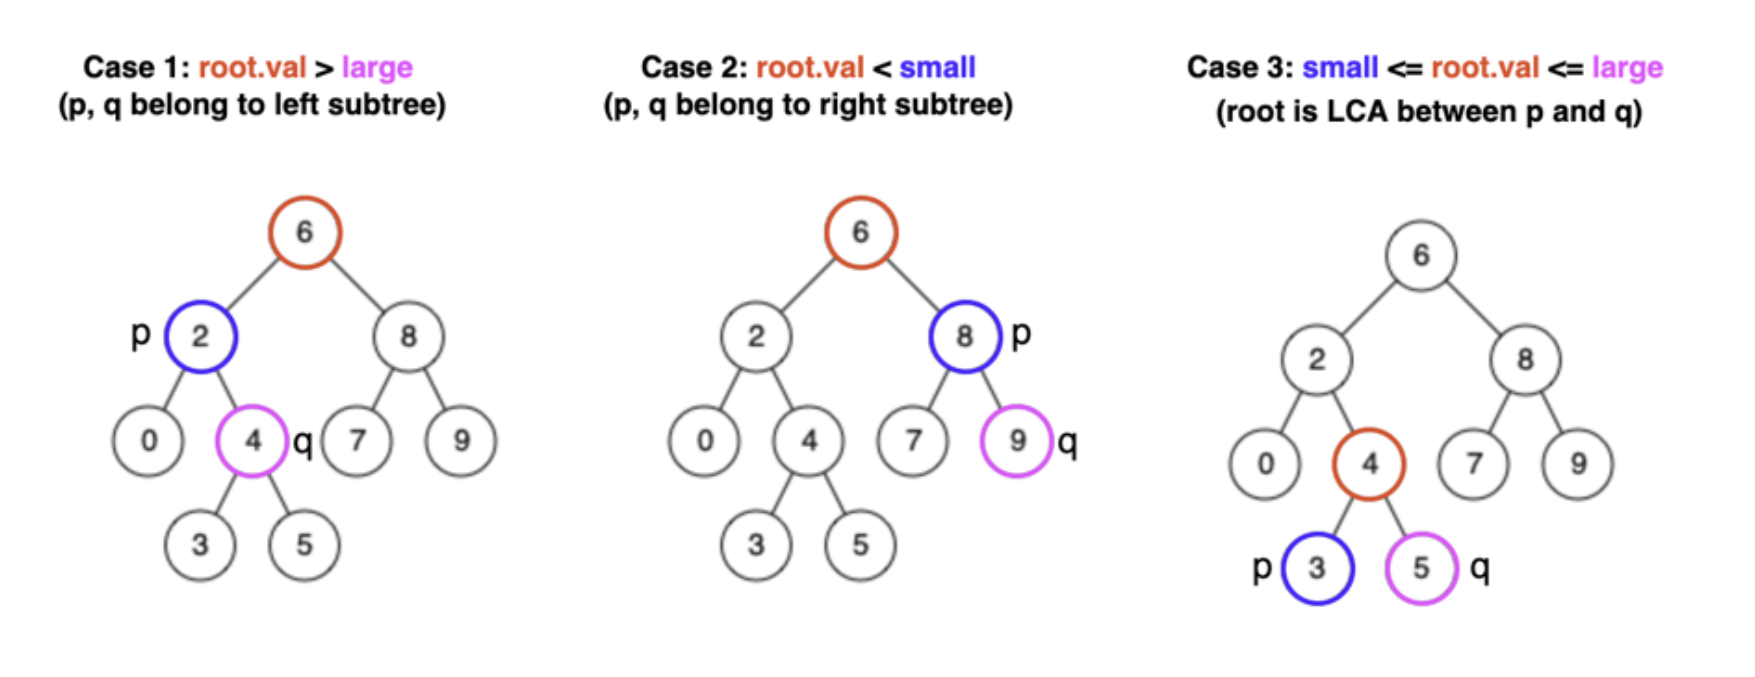

In [71]:
# time --> O(h)
# space --> O(1)
def lowestCommonAncestor(root, p, q):
    small = min(p.val, q.val)
    large = max(p.val, q.val)

    while root:
        if root.val > large:
            root = root.left
        elif root.val < small:
            root = root.right
        else:
            return root
    return None

## 109. Product of array except self

In [72]:
# time --> O(n)
# space --> O(n)

def productExceptSelf(nums):
    
    
    n = len(nums)
    L, R, ans = [0] * n, [0] * n, [0] * n
    
    L[0] = 1
    
    for i in range(1, n):
        L[i] = L[i-1] * nums[i-1]
    
    R[n-1] = 1
    
    for i in reversed(range(n-1)):
        R[i] = R[i+1] * nums[i+1]
    
    for i in range(len(nums)):
        ans[i] = L[i] * R[i]
    
    return ans

In [73]:
# time --> O(n)
# space --> O(1)

def productExceptSelf(nums):

    # The length of the input array
    length = len(nums)

    # The answer array to be returned
    answer = [0] * length

    # answer[i] contains the product of all the elements to the left
    # Note: for the element at index '0', there are no elements to the left,
    # so the answer[0] would be 1
    answer[0] = 1
    for i in range(1, length):

        # answer[i - 1] already contains the product of elements to the left of 'i - 1'
        # Simply multiplying it with nums[i - 1] would give the product of all
        # elements to the left of index 'i'
        answer[i] = nums[i - 1] * answer[i - 1]

    # R contains the product of all the elements to the right
    # Note: for the element at index 'length - 1', there are no elements to the right,
    # so the R would be 1
    R = 1
    for i in reversed(range(length)):

        # For the index 'i', R would contain the
        # product of all elements to the right. We update R accordingly
        answer[i] = answer[i] * R
        R *= nums[i]

    return answer

In [74]:
nums = [1, 2, 3, 4]
productExceptSelf(nums)

[24, 12, 8, 6]

## 110. Valid Anagram

In [75]:
from collections import Counter

# time --> O(n)
# space --> O(1) (as english alphabets are constant)
def isAnagram(s, t):
    return len(s) == len(t) and Counter(s) == Counter(t)

## 111. Meeting Rooms II

Given an array of meeting time intervals intervals where intervals[i] = [starti, endi], return the minimum number of conference rooms required.

 

Example 1:

Input: intervals = [[0,30],[5,10],[15,20]]

Output: 2

Example 2:

Input: intervals = [[7,10],[2,4]]

Output: 1


In [80]:
intervals = [[0,30],[5,10],[15,20]]

import heapq

# min heap
# time --> O(nlogn)
# space --> O(n)

def minMeetingRooms(intervals):
    # If there is no meeting to schedule then no room needs to be allocated.
    if not intervals:
        return 0

    # The heap initialization
    free_rooms = []

    # Sort the meetings in increasing order of their start time.
    intervals.sort(key= lambda x: x[0])

    # Add the first meeting. We have to give a new room to the first meeting.
    heapq.heappush(free_rooms, intervals[0][1])

    # For all the remaining meeting rooms
    for i in intervals[1:]:

        # If the room due to free up the earliest is free, assign that room to this meeting.
        if free_rooms[0] <= i[0]:
            heapq.heappop(free_rooms)

        # If a new room is to be assigned, then also we add to the heap,
        # If an old room is allocated, then also we have to add to the heap with updated end time.
        heapq.heappush(free_rooms, i[1])

    # The size of the heap tells us the minimum rooms required for all the meetings.
    return len(free_rooms)

In [81]:
minMeetingRooms(intervals)

2

## 112. Toeplitz Matrix

Given an m x n matrix, return true if the matrix is Toeplitz. Otherwise, return false.

A matrix is Toeplitz if every diagonal from top-left to bottom-right has the same elements.

Input: matrix = [[1,2,3,4],[5,1,2,3],[9,5,1,2]]

Output: true

Explanation:

In the above grid, the diagonals are: "[9]", "[5, 5]", "[1, 1, 1]", "[2, 2, 2]", "[3, 3]", "[4]".

In each diagonal all elements are the same, so the answer is True.

In [83]:
# time --> O(M x N)
# space --> O(1)
def isToeplitzMatrix(self, matrix):
    return all(r == 0 or c == 0 or matrix[r-1][c-1] == val
               for r, row in enumerate(matrix)
               for c, val in enumerate(row))

In [5]:
# time --> O(M x N)
# space --> O(M + N)
from collections import defaultdict
def isToeplitzMatrix(matrix) -> bool:
        
    hash_map = defaultdict(set)
    
    rows, cols = len(matrix), len(matrix[0])
    
    for row in range(rows):
        for col in range(cols):
            hash_map[row - col].add(matrix[row][col])
    
    
    for key in hash_map.keys():
        if len(hash_map[key]) > 1:
            return False
    
    return True


In [6]:
matrix = [[1,2,3,4],[5,1,2,3],[9,5,1,2]]
isToeplitzMatrix(matrix)

True

## 114. Jewels and Stones

You're given strings jewels representing the types of stones that are jewels, and stones representing the stones you have. Each character in stones is a type of stone you have. You want to know how many of the stones you have are also jewels.

Letters are case sensitive, so "a" is considered a different type of stone from "A".

 

Example 1:

Input: jewels = "aA", stones = "aAAbbbb"

Output: 3

In [1]:
# time --> O(J + S)
# space --> O(J)
def numJewelsInStones(jewels, stones):
    jewel_set = set(jewels)
    
    total = 0
    
    for s in stones:
        if s in jewel_set:
            total+= 1
    
    return total

In [2]:
jewels = "aA"
stones = "aAAbbbb"

numJewelsInStones(jewels, stones)

3

## 115. Find Duplicate

Given an array of integers nums containing n + 1 integers where each integer is in the range [1, n] inclusive.

There is only one repeated number in nums, return this repeated number.

You must solve the problem without modifying the array nums and using only constant extra space.

In [3]:
# time --> O(n)
# space --> O(n)
def findDuplicate(nums) -> int:
    seen = set()

    for num in nums:
        if num in seen:
            return num
        seen.add(num)


In [4]:
nums = [1,3,4,2,2]
findDuplicate(nums)

2

In [8]:
# time --> O(n)
# space --> O(1)

# For example, if the input array is [1,3,3,2], then for 1, flip the number at index 1, 
# making the array [1,−3,3,2]. Next, for −3 flip the number at index 3, making the array [1,−3,3,−2]. 
# Finally, when we reach the second 3, we'll notice that nums[3] is already negative,
# indicating that 3 has been seen before and hence is the duplicate number.



def findDuplicate(nums):
    for num in nums:
        curr = abs(num)
        if nums[curr] < 0:
            duplicate = curr
            break
        nums[curr] = -nums[curr]
        
    for i in range(len(nums)):
        nums[i] = -nums[i]
    
    return duplicate

In [10]:
nums = [1,3,4,2,2]
findDuplicate(nums)

2

## 116. Sum of unique elements

In [14]:
from collections import Counter
def sumOfUnique(nums):
    hashMap = Counter(nums)
    result = 0
    for num in nums:
        if hashMap[num] == 1:
            result += num
    return result

In [15]:
nums = [1,2,3,2]
sumOfUnique(nums)

4

## 117. Koko eating bananas

Koko loves to eat bananas. There are n piles of bananas, the ith pile has piles[i] bananas. The guards have gone and will come back in h hours.

Koko can decide her bananas-per-hour eating speed of k. Each hour, she chooses some pile of bananas and eats k bananas from that pile. If the pile has less than k bananas, she eats all of them instead and will not eat any more bananas during this hour.

Koko likes to eat slowly but still wants to finish eating all the bananas before the guards return.

Return the minimum integer k such that she can eat all the bananas within h hours.

 

Example 1:

Input: piles = [3,6,7,11], h = 8

Output: 4

In [18]:
# time --> O(nlogm) (n be the length of the input array piles and 
# m be the maximum number of bananas in a single pile from piles.)

# space --> O(1)

import math
def minEatingSpeed(piles, h):
    left = 1
    right = max(piles)
    
    while left < right:
        mid = (left + right) // 2
        
        hour_spent = 0
        
        for pile in piles:
            hour_spent += math.ceil(pile / mid)
            
            if hour_spent <= h:
                right = mid
            else:
                left = mid + 1
    return left

In [19]:
piles = [3,6,7,11]
h = 8
minEatingSpeed(piles, h)

4

## 118. Walls and Gates

In [20]:
directions = [[-1, 0], [0, 1], [1, 0], [0, -1]]
# time --> O(m x n)
# space --> O(m x n)

def wallsAndGates(rooms):
   
    WALL=-1
    GATE=0
    EMPTY=2147483647
    
    for row in range(len(rooms)):
        for col in range(len(rooms[0])):
            if rooms[row][col] == 0:
                dfs(rooms, row, col, 0)


def dfs(rooms, row, col, current_step):
    if row < 0 or row >= len(rooms) or col < 0 or col >= len(rooms[0]) or current_step > rooms[row][col]:
        return
    
    if rooms[row][col] == -1:
        return
    
    rooms[row][col] = current_step
    
    for i in range(len(directions)):
        direction = directions[i]
        
        dfs(rooms, row + direction[0], col + direction[1], current_step + 1)

In [22]:
rooms = [[2147483647,-1,0,2147483647],[2147483647,2147483647,2147483647,-1],[2147483647,-1,2147483647,-1],[0,-1,2147483647,2147483647]]

wallsAndGates(rooms)
print(rooms)

[[3, -1, 0, 1], [2, 2, 1, -1], [1, -1, 2, -1], [0, -1, 3, 4]]


## 119. Number of ways to split array

You are given a 0-indexed integer array nums of length n.

nums contains a valid split at index i if the following are true:

The sum of the first i + 1 elements is greater than or equal to the sum of the last n - i - 1 elements.
There is at least one element to the right of i. That is, 0 <= i < n - 1.
Return the number of valid splits in nums.

 

Example 1:

Input: nums = [10,4,-8,7]

Output: 2

Explanation: 

There are three ways of splitting nums into two non-empty parts:

- Split nums at index 0. Then, the first part is [10], and its sum is 10. The second part is [4,-8,7], and its sum is 3. Since 10 >= 3, i = 0 is a valid split.
- Split nums at index 1. Then, the first part is [10,4], and its sum is 14. The second part is [-8,7], and its sum is -1. Since 14 >= -1, i = 1 is a valid split.
- Split nums at index 2. Then, the first part is [10,4,-8], and its sum is 6. The second part is [7], and its sum is 7. Since 6 < 7, i = 2 is not a valid split.

Thus, the number of valid splits in nums is 2.


In [23]:
# time --> O(n)
# space --> O(1)
def waysToSplitArray(nums):
    left_sum = 0
    right_sum = sum(nums)
    
    count = 0
    
    for i in range(len(nums) - 1):
        left_sum += nums[i]
        right_sum -= nums[i]
        
        if left_sum >= right_sum:
            count += 1
    return count

## 120. Longest Substring without repeating characters

In [24]:
def lengthOfLongestSubstring(s):
    if len(s) <= 1:
        return len(s)
    
    seen_chars = {}
    longest = 0
    left = 0
    
    for right in range(len(s)):
        current_char = s[right]
        prev_seen_char = -1
        
        if current_char in seen_chars:
            prev_seen_char = seen_chars[current_char]
        
        if prev_seen_char >= left:
            left = prev_seen_char + 1
            
        seen_chars[current_char] = right
        longest = max(longest, right - left + 1)
        
    return longest

In [25]:
s = "abcabcbb"
lengthOfLongestSubstring(s)

3